In [27]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil

In [8]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [9]:
t_d = os.path.join(wd, "ies_template_all")

In [10]:
org_t_d = os.path.join("master_glm_1")
if not os.path.exists(org_t_d):
    raise Exception("you need to run the '/part2_04_glm/freyberg_glm_1.ipynb' notebook")

if os.path.exists(t_d):
    shutil.rmtree(t_d)
shutil.copytree(org_t_d,t_d)

'D:/spark/animas_amrs\\ies_template_all'

In [11]:
# write PST 
case = 'animas_amrs_pp'

In [12]:
num_workers = 80 #update this according to your resources

m_d = os.path.join('master_glm_2')

In [13]:
# run glm in parallel
pyemu.os_utils.start_workers(t_d,"pestpp-glm",f"{case}.pst",
                           num_workers=num_workers,
                           worker_root=".",
                           master_dir=m_d)

In [14]:
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_pp.pst'))
pst.phi

13636522895617.906

In [15]:
print(f"Phi: {pst.phi} \nNumber of non-zero obs: {pst.nnz_obs}")

Phi: 13636522895617.906 
Number of non-zero obs: 4486


In [16]:
# make a dataframe "df_obj" that shows the contents of the pst file casename with the extension .iobj
# .iobj = PEST++ output file that has the objective function by iteration 
df_obj = pd.read_csv(os.path.join(m_d, "animas_amrs_pp.iobj"),index_col=0)
# echo out the dataframe
df_obj.head()

Empty DataFrame
Columns: [model_runs_completed, total_phi, measurement_phi, regularization_phi, d009_cca, d009_ck, d009_cmg, d009_cna, d009_cso4, d009_lca, d009_lk, d009_lmg, d009_lna, d009_lso4, d012_cca, d012_ccl, d012_chco3, d012_ck, d012_cmg, d012_cna, d012_cso4, d012_lca, d012_lcl, d012_lhco3, d012_lk, d012_lmg, d012_lna, d012_lso4, d075_cca, d075_ccl, d075_cco, d075_chco3, d075_ck, d075_cmg, d075_cna, d075_cso4, d075_lca, d075_lcl, d075_lco, d075_lhco3, d075_lk, d075_lmg, d075_lna, d075_lso4, m009_lca, m009_lk, m009_lmg, m009_lna, m009_lso4, m012_lca, m012_lcl, m012_lhco3, m012_lk, m012_lmg, m012_lna, m012_lso4, m075_lca, m075_lcl, m075_lco, m075_lhco3, m075_lk, m075_lmg, m075_lna, m075_lso4]
Index: []

[0 rows x 64 columns]

In [17]:
# plot out the dataframe that was shown as a table above
df_obj.loc[:,["total_phi","model_runs_completed"]].plot(subplots=True)

TypeError: no numeric data to plot

<Figure size 800x1050 with 0 Axes>

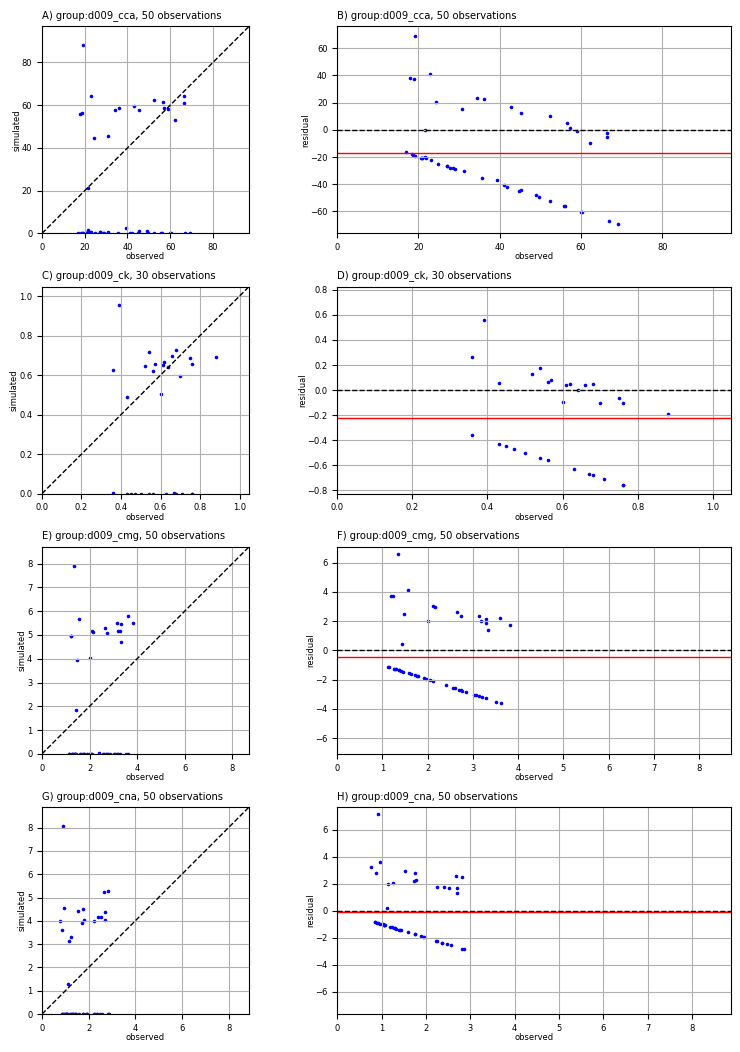

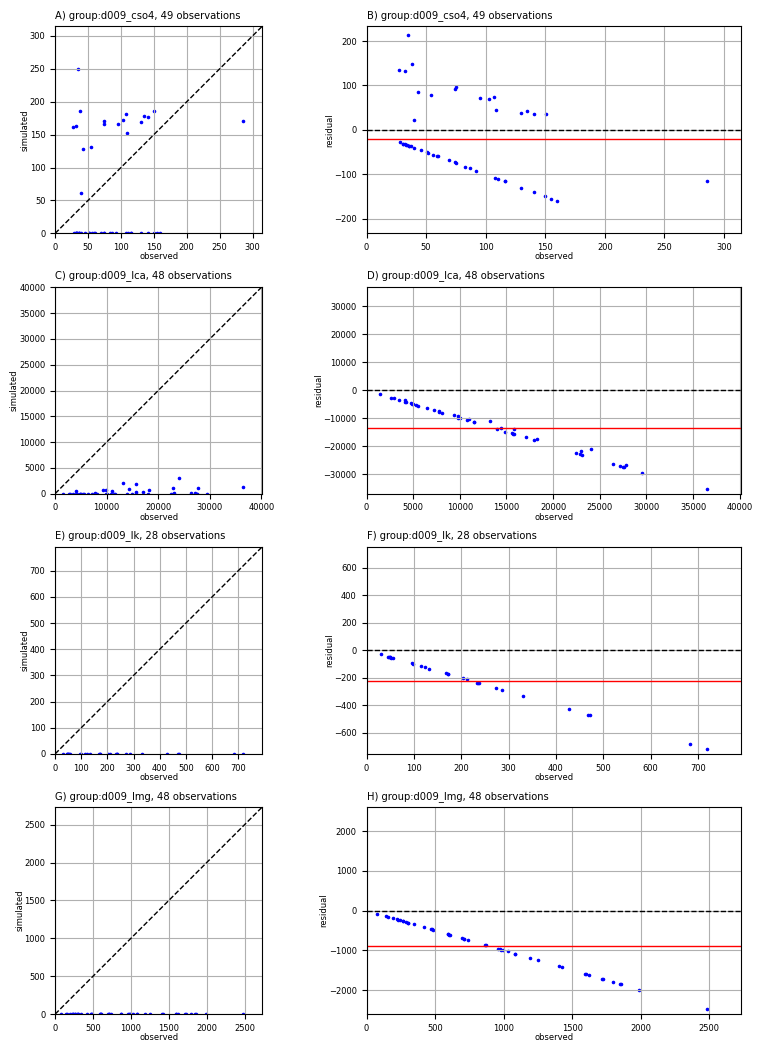

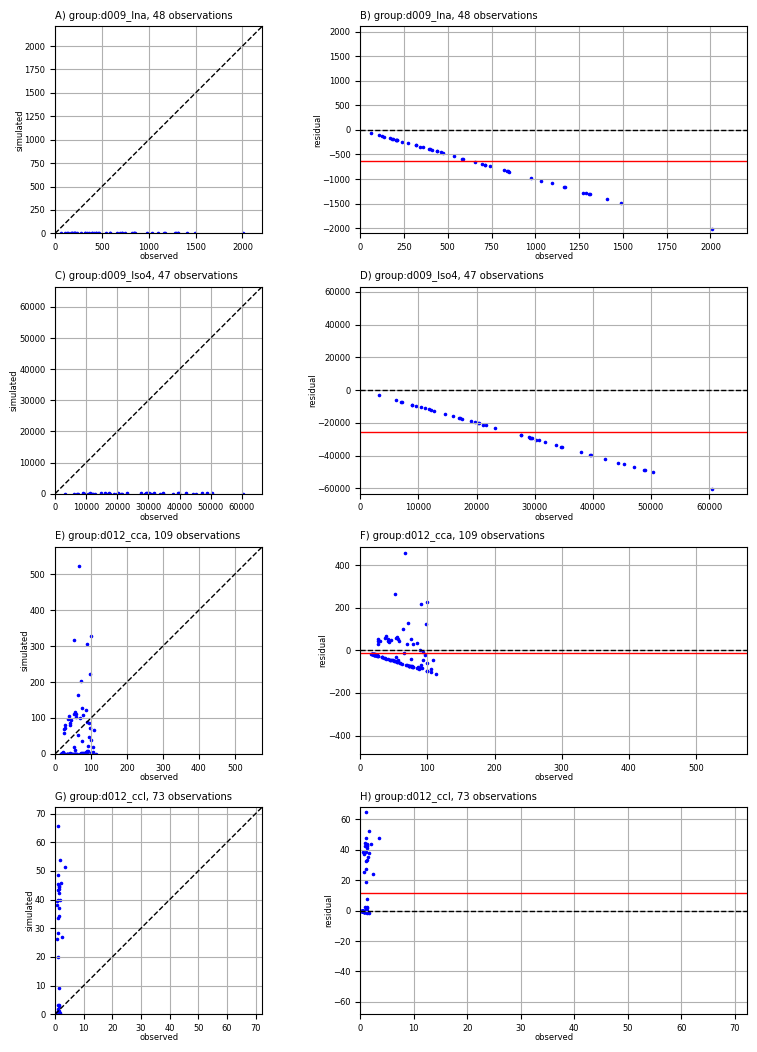

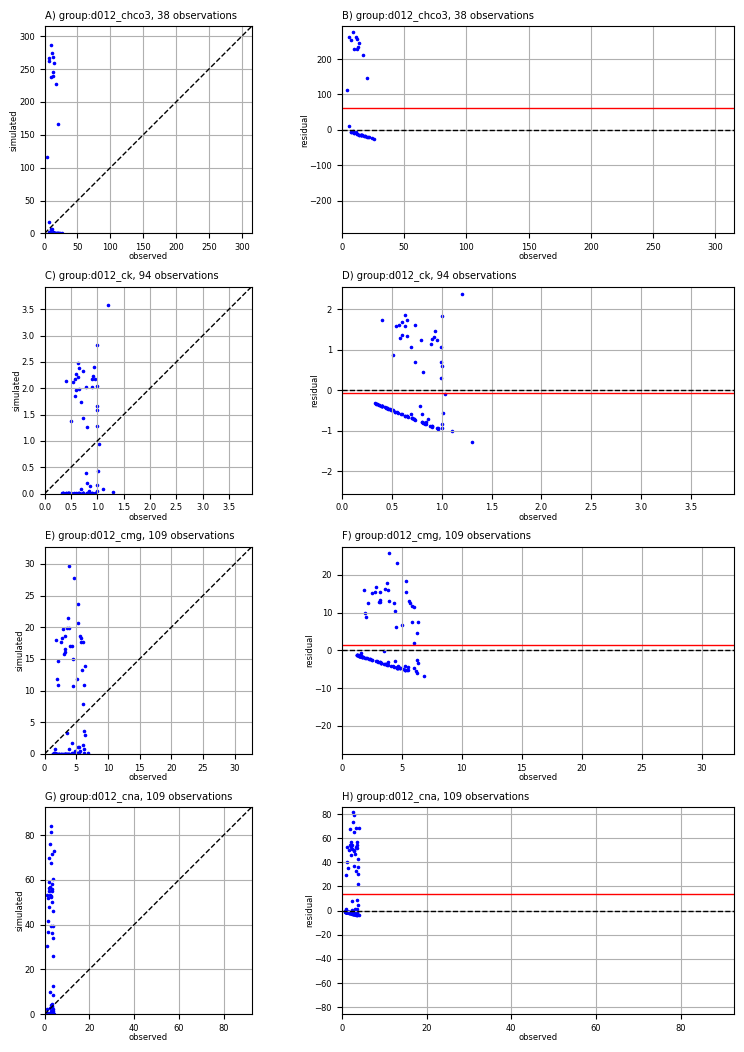

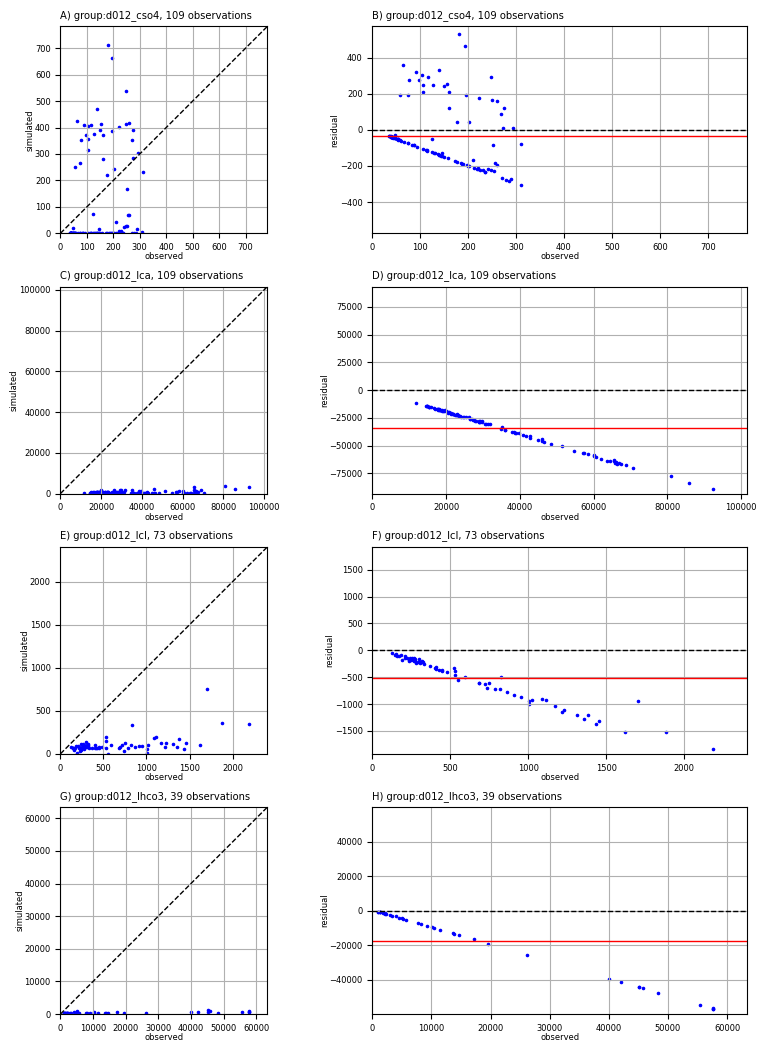

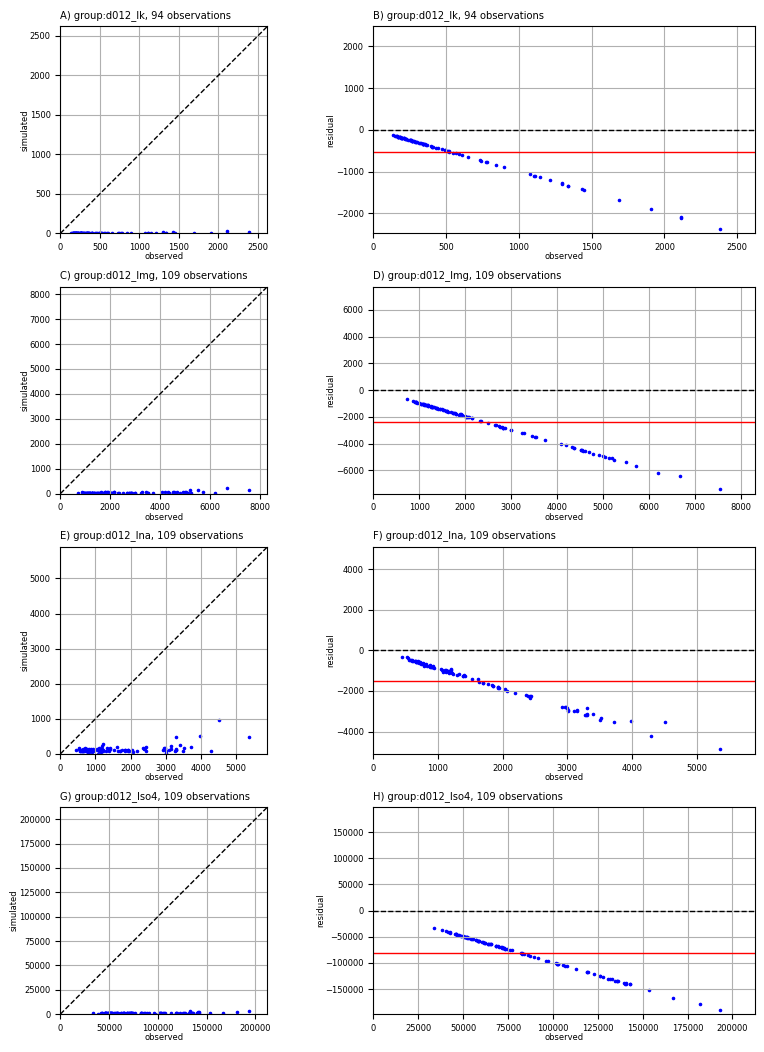

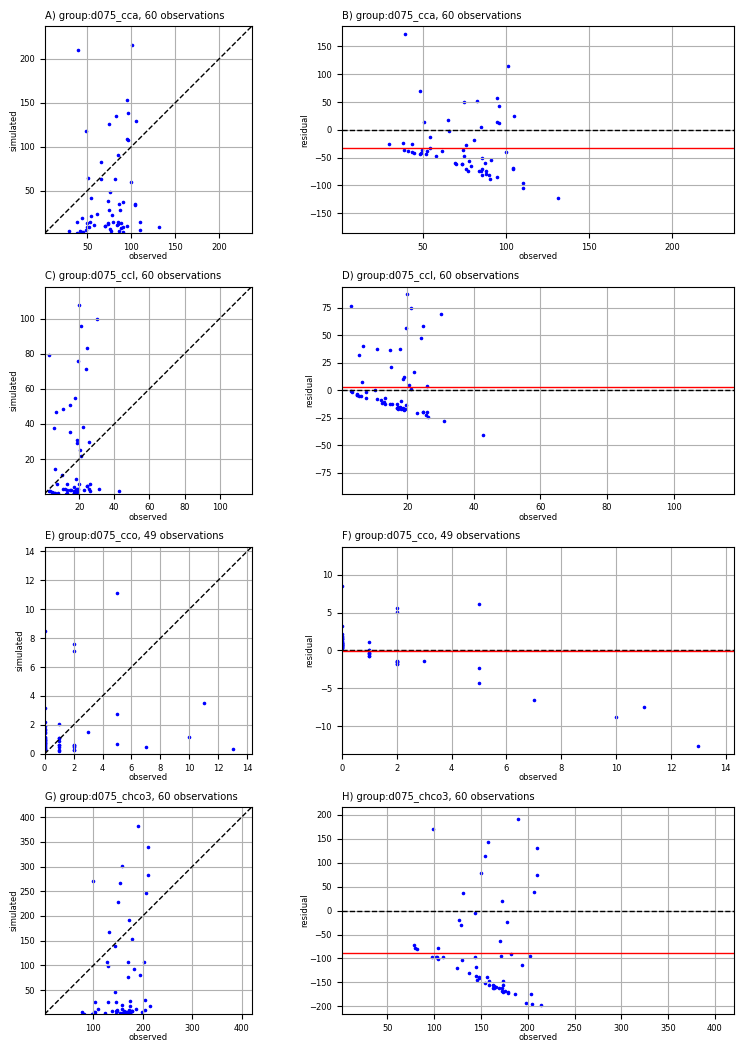

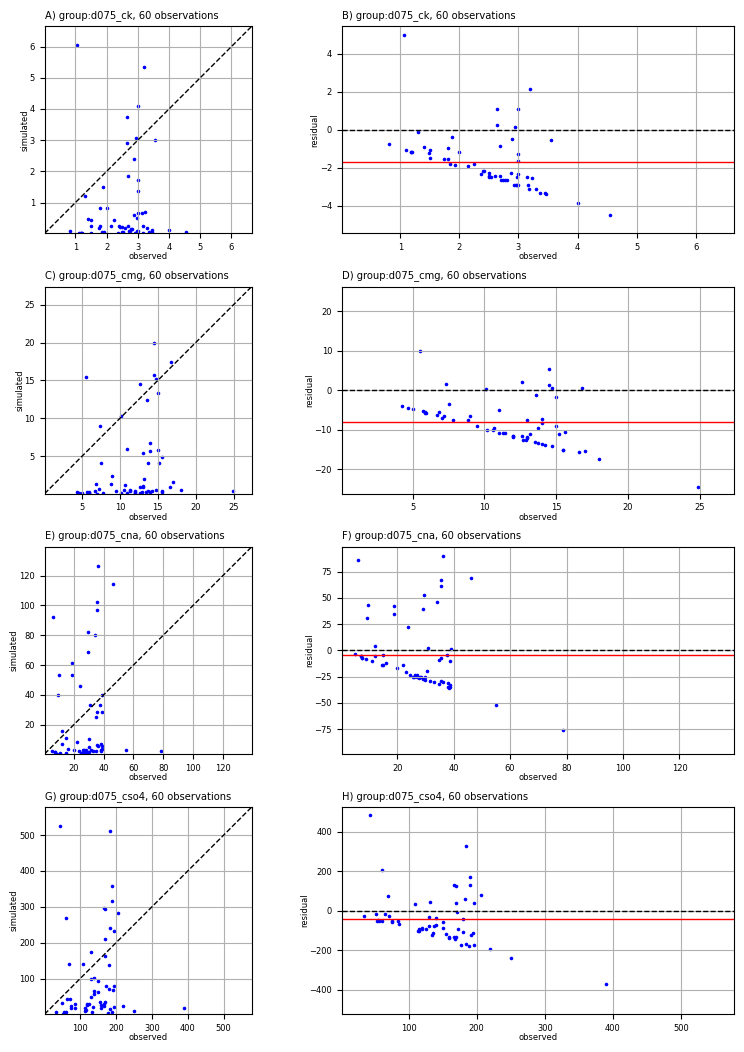

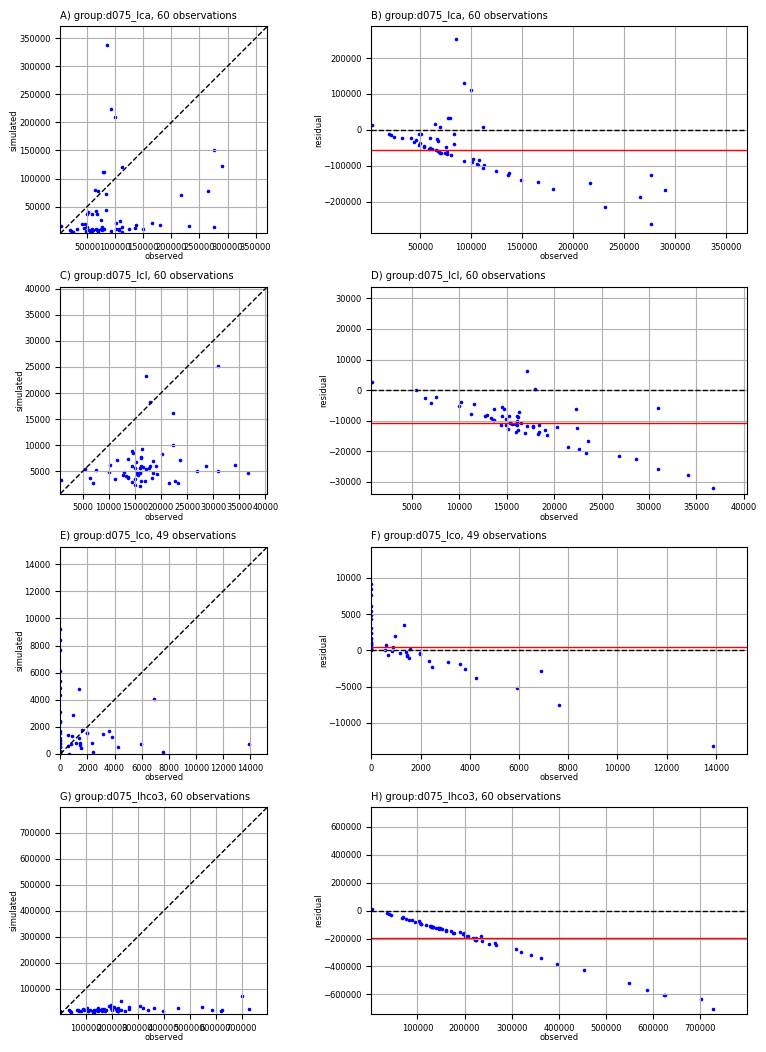

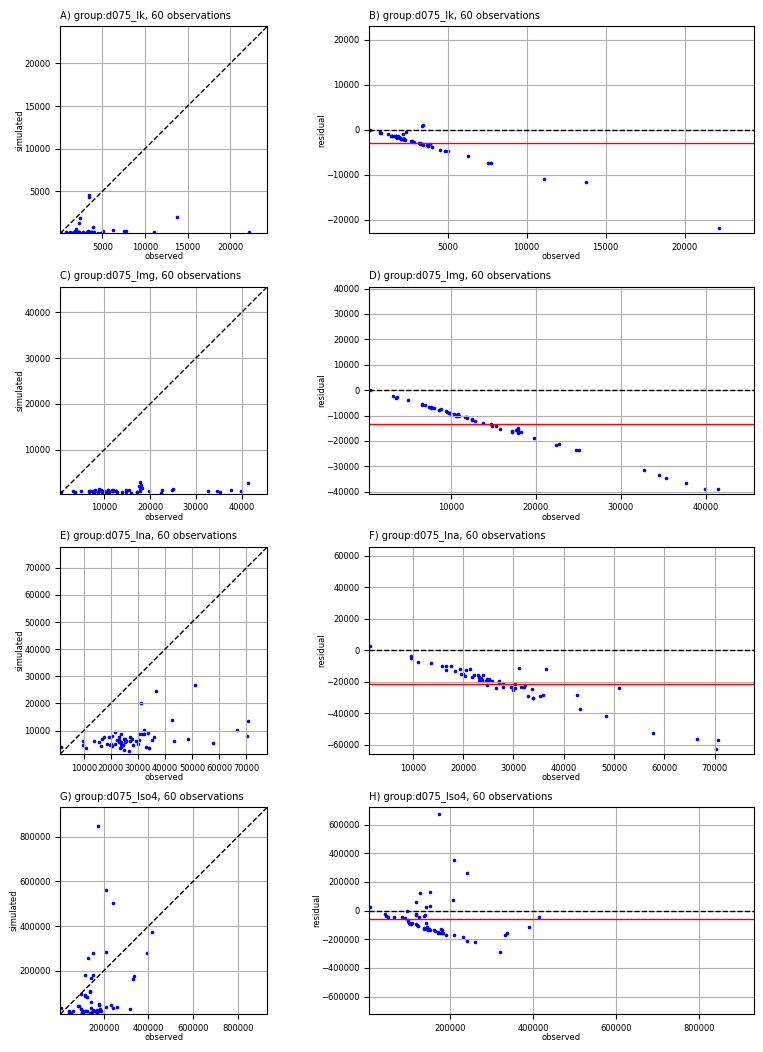

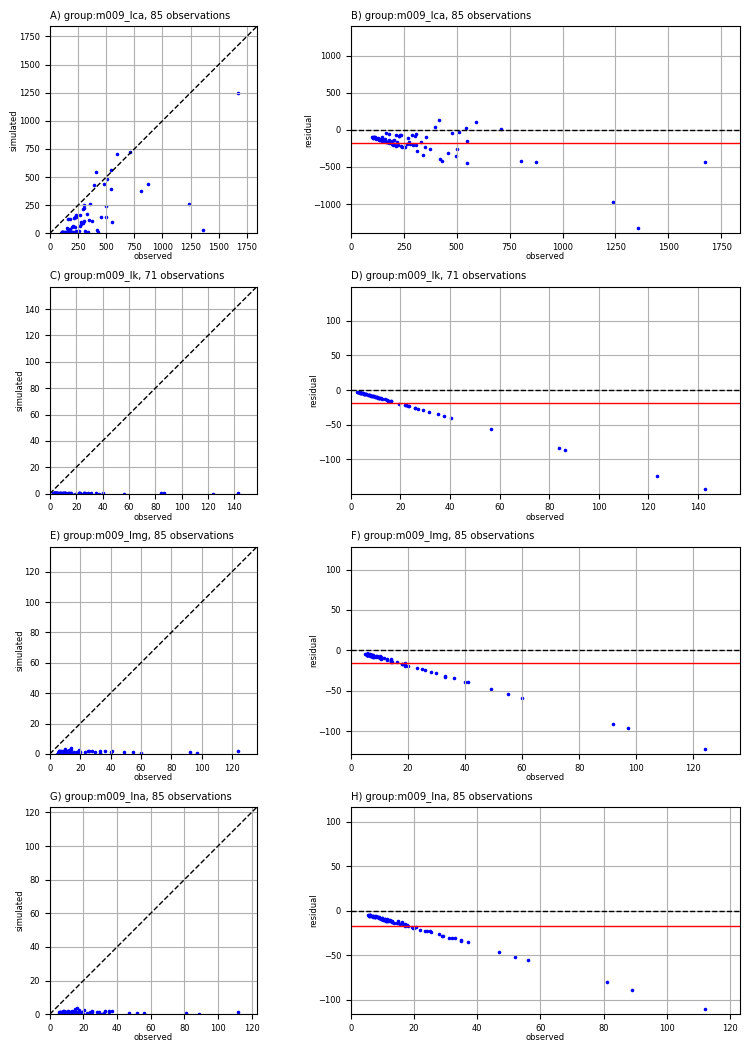

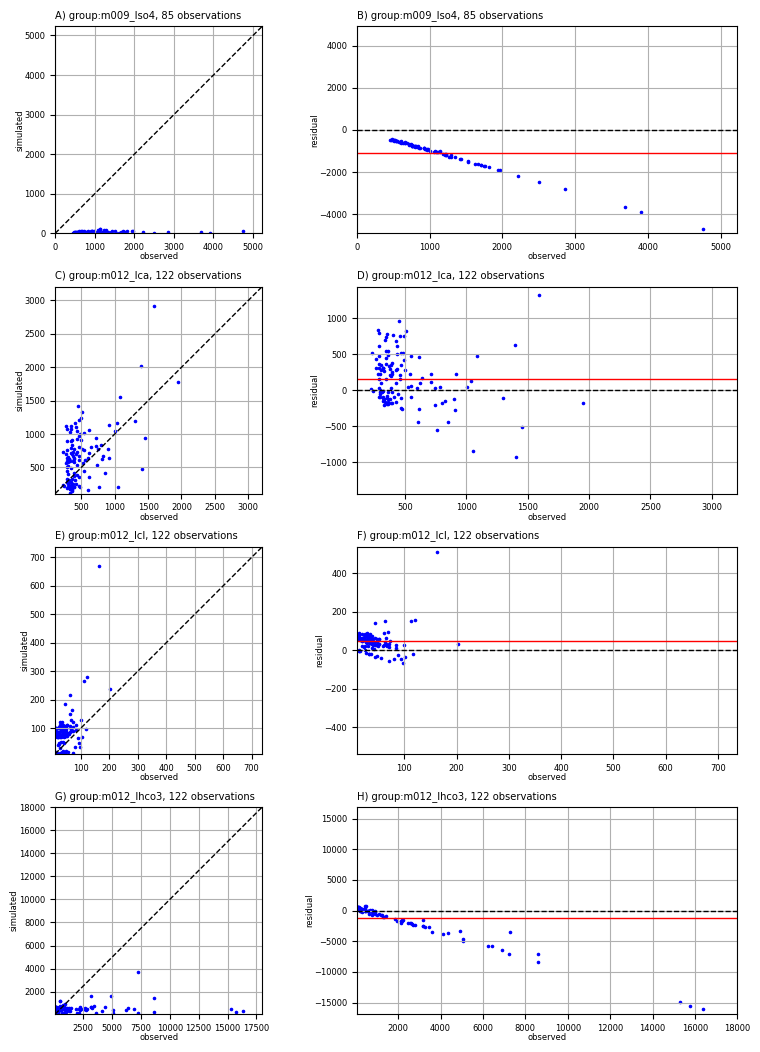

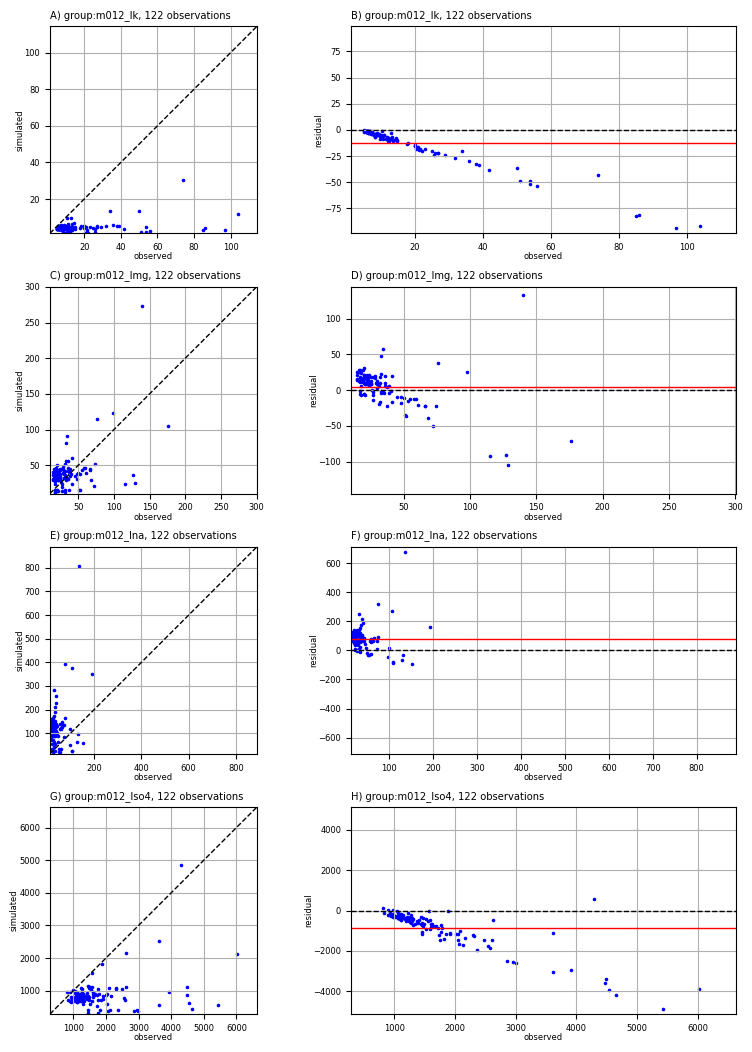

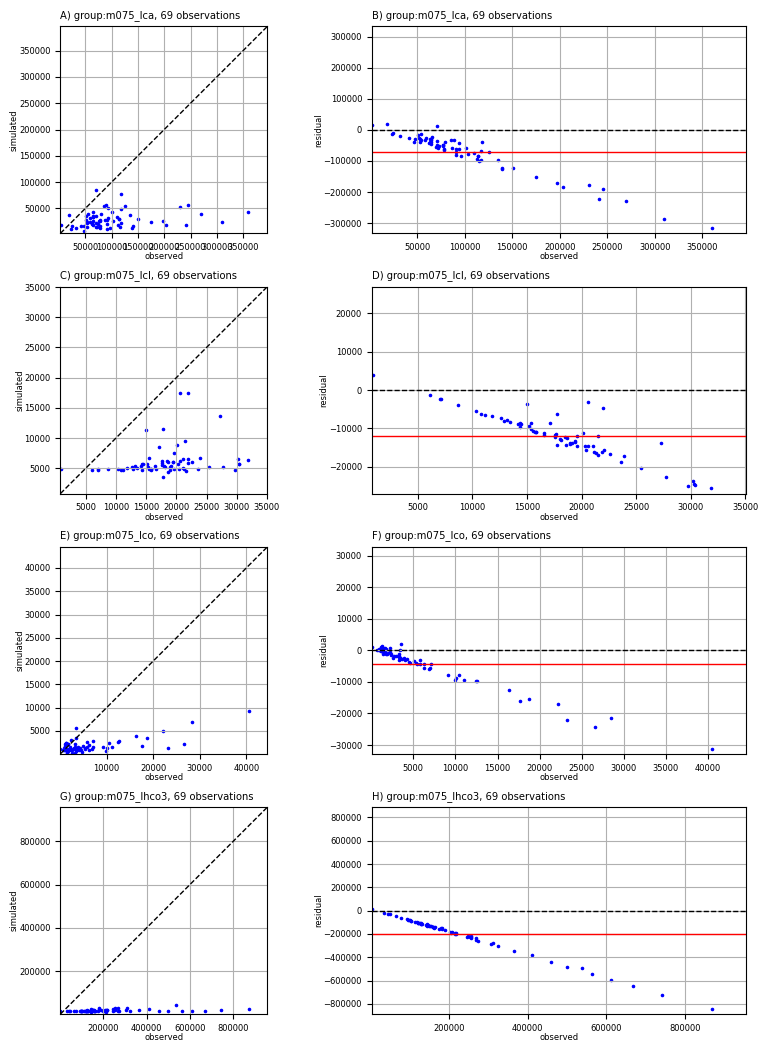

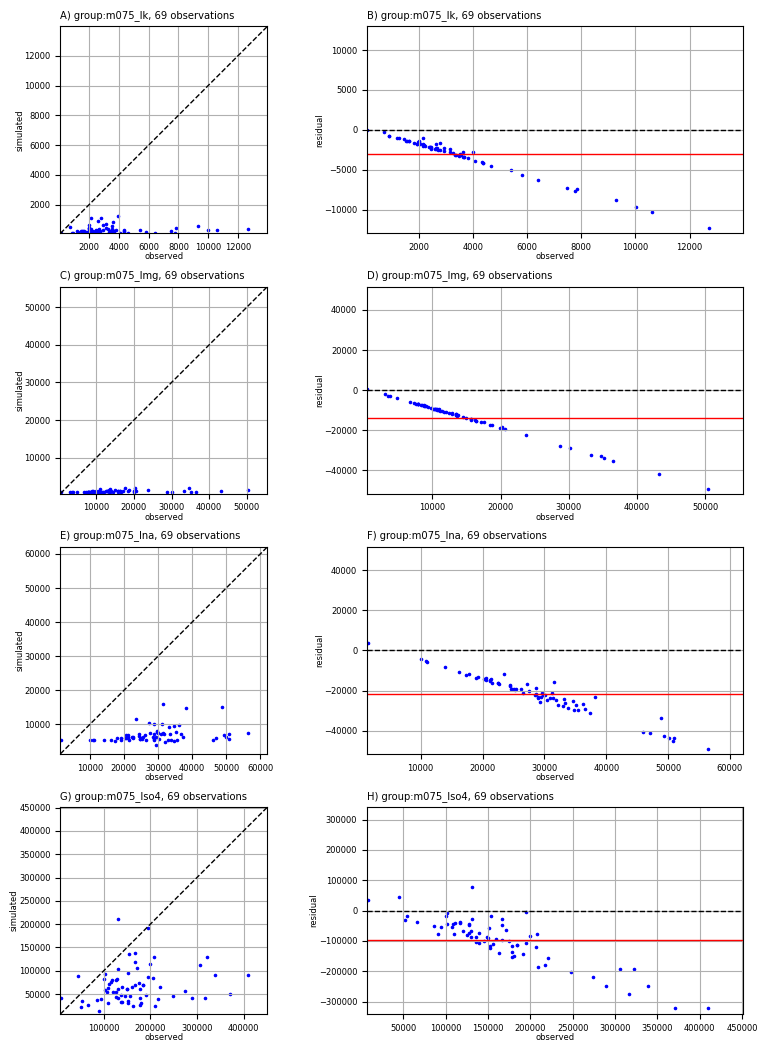

In [18]:
# use pyemu's plot utilities to plot 1:1 line and the residuals as fxn of observation magnitude
pyemu.plot_utils.res_1to1(pst);

In [19]:
df = df=pd.read_csv(os.path.join(m_d,"animas_amrs_pp.post.obsen.csv"),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

oe.head()

C:\Users\seonggyu.park\AppData\Local\miniconda3\envs\apexmf\lib\site-packages\pyemu\en.py:424: UserWarning: Ensemble.from_dataframe() is deprecated and has been replaced with the standard constructor, which takesthe same arguments


d009_cca_19961119  d009_cca_19970108  d009_cca_19970130   
real_name                                                            
0                          0                  0                  0  \
1                          0                  0                  0   
2                          0                  0                  0   
3                          0                  0                  0   
4                          0                  0                  0   

           d009_cca_19970225  d009_cca_19970325  d009_cca_19970429   
real_name                                                            
0                          0                  0                  0  \
1                          0                  0                  0   
2                          0                  0                  0   
3                          0                  0                  0   
4                          0                  0                  0   

           d009_cca_19970514  d009_cca_19970521  d009_cca_19970529   
real_name                                                            
0                   0.075013            21.6758           0.738802  \
1                   0.077216            21.0627           0.740757   
2                   0.088691            21.8299           0.759682   
3                   0.073502            21.0057           0.740478   
4                   0.085963            21.4632           0.753417   

           d009_cca_19970605  ...  m075_lso4_200707  m075_lso4_200810   
real_name                     ...                                       
0                   0.352279  ...           80885.1           48787.3  \
1                   0.353035  ...           79750.3           48346.4   
2                   0.366583  ...          153209.0           93974.8   
3                   0.350399  ...          127577.0          102587.0   
4                   0.364010  ...          153394.0          100822.0   

           m075_lso4_200812  m075_lso4_200902  m075_lso4_200904   
real_name                                                         
0                   45788.7           32924.0           31958.0  \
1                   45561.6           32283.2           31117.0   
2                   69825.6           43834.2           42351.9   
3                   98315.3           81498.2           87660.0   
4                   73403.0           50670.8           44620.4   

           m075_lso4_200906  m075_lso4_200912  m075_lso4_201005   
real_name                                                         
0                   64674.3           42308.1           45363.3  \
1                   63554.5           41620.0           44944.5   
2                  132046.0           50696.7           78419.9   
3                  117259.0           93230.8          113140.0   
4                  140391.0           50499.9           78346.4   

           m075_lso4_201007  m075_lso4_201111  
real_name                                      
0                   75026.7           35194.9  
1                   74245.2           33873.4  
2                  113110.0           45974.6  
3                  126778.0           84754.4  
4                  111106.0           48714.1  

[5 rows x 4486 columns]

<Axes: >

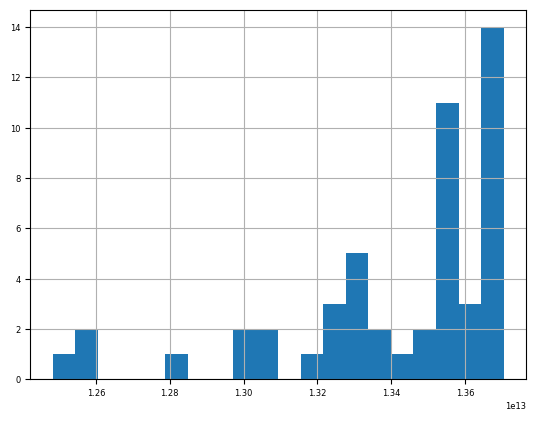

In [20]:
oe.phi_vector.sort_values().hist(bins=20)

In [21]:
oe_pt = oe.loc[oe.phi_vector.sort_values().index[:30],:] #just take the 30 lowest phi realizations

In [23]:
oe_pt

return type uncaught, losing Ensemble type, returning DataFrame


C:\Users\seonggyu.park\AppData\Local\miniconda3\envs\apexmf\lib\site-packages\pyemu\en.py:225: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame


d009_cca_19961119  d009_cca_19970108  d009_cca_19970130   
real_name                                                            
43                         0                  0                  0  \
16                         0                  0                  0   
46                         0                  0                  0   
3                          0                  0                  0   
9                          0                  0                  0   
44                         0                  0                  0   
25                         0                  0                  0   
40                         0                  0                  0   
11                         0                  0                  0   
38                         0                  0                  0   
7                          0                  0                  0   
29                         0                  0                  0   
34                         0                  0                  0   
4                          0                  0                  0   
2                          0                  0                  0   
35                         0                  0                  0   
22                         0                  0                  0   
47                         0                  0                  0   
30                         0                  0                  0   
10                         0                  0                  0   
23                         0                  0                  0   
36                         0                  0                  0   
37                         0                  0                  0   
18                         0                  0                  0   
28                         0                  0                  0   
39                         0                  0                  0   
24                         0                  0                  0   
12                         0                  0                  0   
27                         0                  0                  0   
26                         0                  0                  0   

           d009_cca_19970225  d009_cca_19970325  d009_cca_19970429   
real_name                                                            
43                         0                  0                  0  \
16                         0                  0                  0   
46                         0                  0                  0   
3                          0                  0                  0   
9                          0                  0                  0   
44                         0                  0                  0   
25                         0                  0                  0   
40                         0                  0                  0   
11                         0                  0                  0   
38                         0                  0                  0   
7                          0                  0                  0   
29                         0                  0                  0   
34                         0                  0                  0   
4                          0                  0                  0   
2                          0                  0                  0   
35                         0                  0                  0   
22                         0                  0                  0   
47                         0                  0                  0   
30                         0                  0                  0   
10                         0                  0                  0   
23                         0                  0                  0   
36                         0                  0                  0   
37                         0                  0                  0   
18                  

In [24]:
nz_obs

obsnme    obsval  weight     obgnme  oname   
obsnme                                                                     
d009_cca_19961119  d009_cca_19961119      52.4     1.0   d009_cca    NaN  \
d009_cca_19970108  d009_cca_19970108      56.1     1.0   d009_cca    NaN   
d009_cca_19970130  d009_cca_19970130      69.2     1.0   d009_cca    NaN   
d009_cca_19970225  d009_cca_19970225      60.1     1.0   d009_cca    NaN   
d009_cca_19970325  d009_cca_19970325      44.8     1.0   d009_cca    NaN   
...                              ...       ...     ...        ...    ...   
m075_lso4_200906    m075_lso4_200906  220707.0     1.0  m075_lso4    NaN   
m075_lso4_200912    m075_lso4_200912  130089.0     1.0  m075_lso4    NaN   
m075_lso4_201005    m075_lso4_201005  248012.0     1.0  m075_lso4    NaN   
m075_lso4_201007    m075_lso4_201007  116313.0     1.0  m075_lso4    NaN   
m075_lso4_201111    m075_lso4_201111  151840.0     1.0  m075_lso4    NaN   

                   otype  usecol  time   i   j  totim  
obsnme                                                 
d009_cca_19961119    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970108    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970130    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970225    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970325    NaN     NaN   NaN NaN NaN    NaN  
...                  ...     ...   ...  ..  ..    ...  
m075_lso4_200906     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_200912     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201005     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201007     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201111     NaN     NaN   NaN NaN NaN    NaN  

[4486 rows x 11 columns]

In [37]:
nz_obs

obsnme    obsval  weight     obgnme  oname   
obsnme                                                                     
d009_cca_19961119  d009_cca_19961119      52.4     1.0   d009_cca    NaN  \
d009_cca_19970108  d009_cca_19970108      56.1     1.0   d009_cca    NaN   
d009_cca_19970130  d009_cca_19970130      69.2     1.0   d009_cca    NaN   
d009_cca_19970225  d009_cca_19970225      60.1     1.0   d009_cca    NaN   
d009_cca_19970325  d009_cca_19970325      44.8     1.0   d009_cca    NaN   
...                              ...       ...     ...        ...    ...   
m075_lso4_200906    m075_lso4_200906  220707.0     1.0  m075_lso4    NaN   
m075_lso4_200912    m075_lso4_200912  130089.0     1.0  m075_lso4    NaN   
m075_lso4_201005    m075_lso4_201005  248012.0     1.0  m075_lso4    NaN   
m075_lso4_201007    m075_lso4_201007  116313.0     1.0  m075_lso4    NaN   
m075_lso4_201111    m075_lso4_201111  151840.0     1.0  m075_lso4    NaN   

                   otype  usecol  time   i   j  totim  
obsnme                                                 
d009_cca_19961119    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970108    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970130    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970225    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970325    NaN     NaN   NaN NaN NaN    NaN  
...                  ...     ...   ...  ..  ..    ...  
m075_lso4_200906     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_200912     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201005     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201007     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201111     NaN     NaN   NaN NaN NaN    NaN  

[4486 rows x 11 columns]

In [32]:
time_col = []
for i in range(len(nz_obs)):
    if nz_obs.iloc[i, 0][0] == "d":
        time_col.append(nz_obs.iloc[i, 0][-8:])
    elif nz_obs.iloc[i, 0][0] == "m":
        time_col.append(nz_obs.iloc[i, 0][-6:])


In [33]:
nz_obs.time = time_col

In [40]:
nz_obs.time

obsnme
d009_cca_19961119   NaN
d009_cca_19970108   NaN
d009_cca_19970130   NaN
d009_cca_19970225   NaN
d009_cca_19970325   NaN
                     ..
m075_lso4_200906    NaN
m075_lso4_200912    NaN
m075_lso4_201005    NaN
m075_lso4_201007    NaN
m075_lso4_201111    NaN
Name: time, Length: 4486, dtype: float64

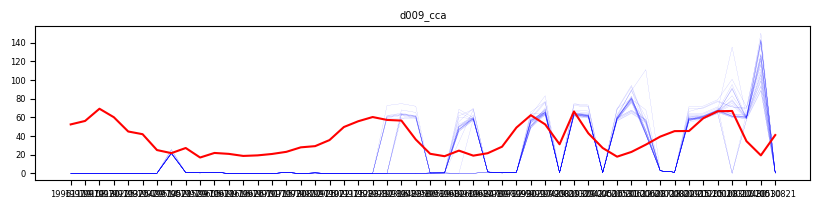

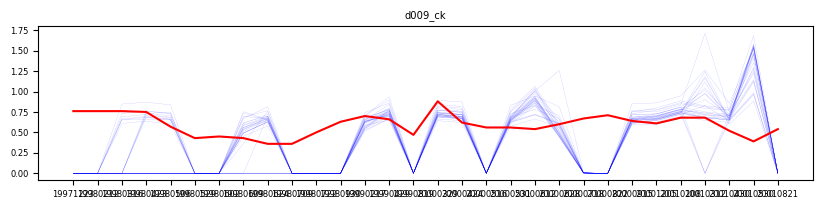

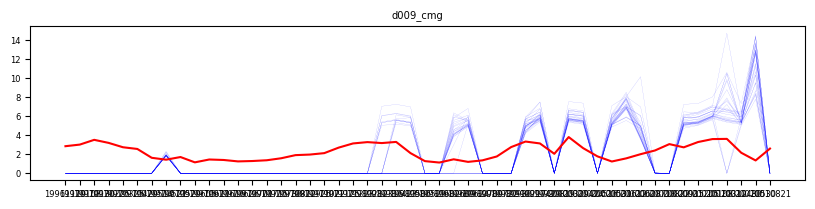

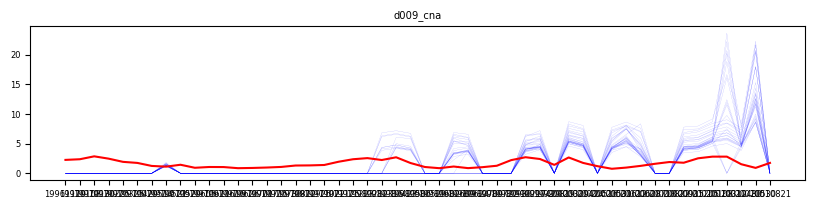

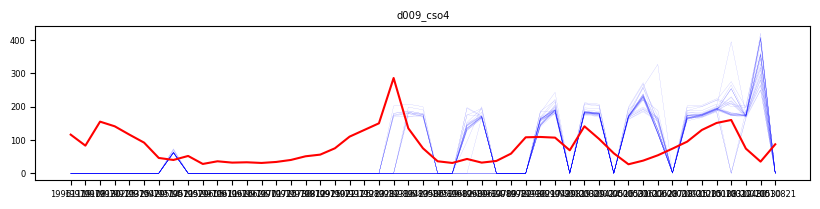

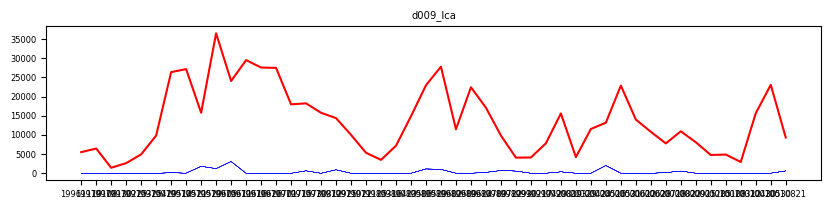

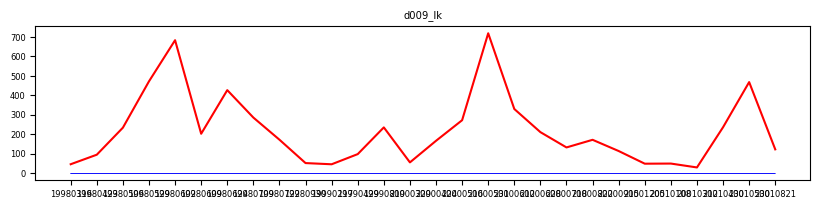

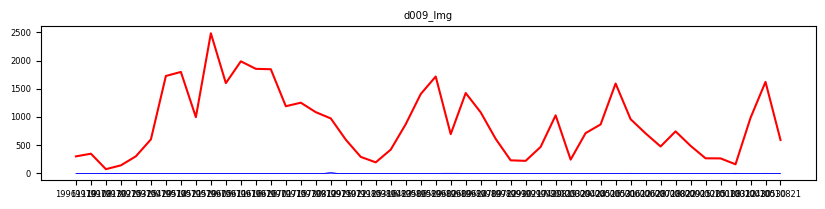

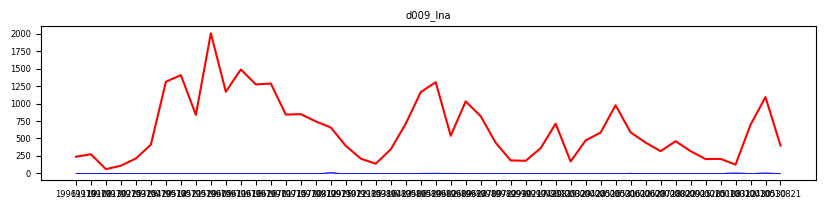

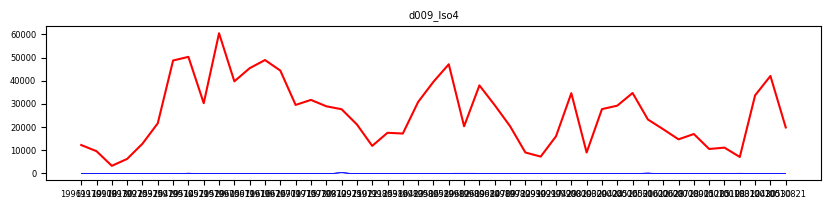

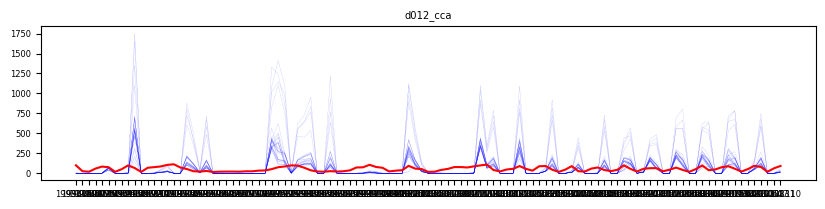

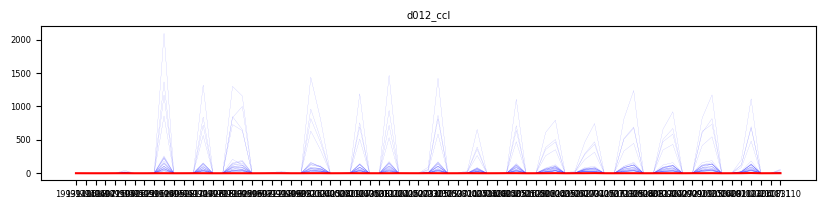

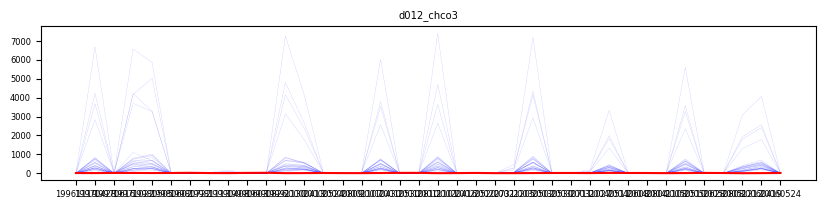

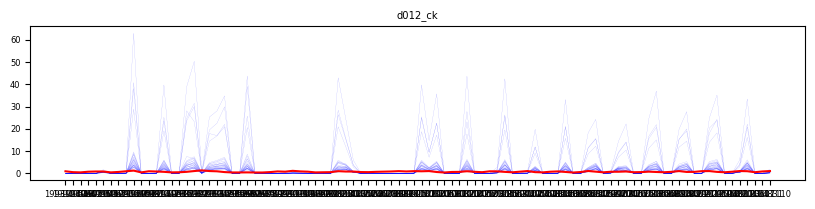

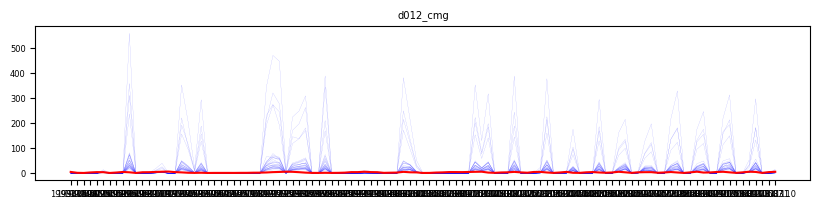

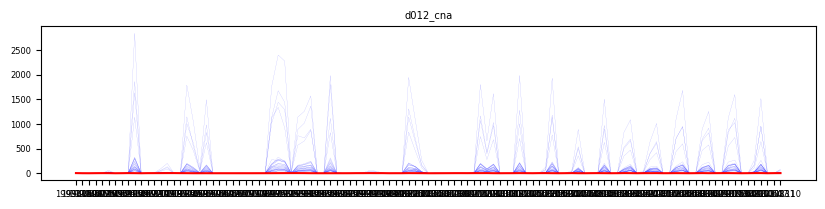

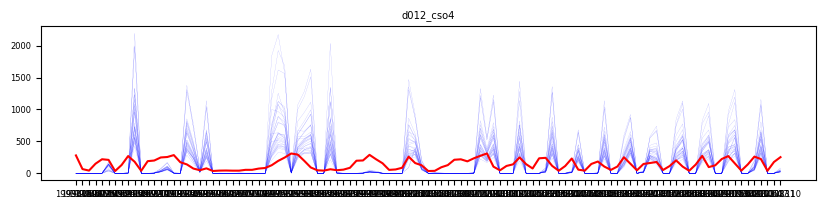

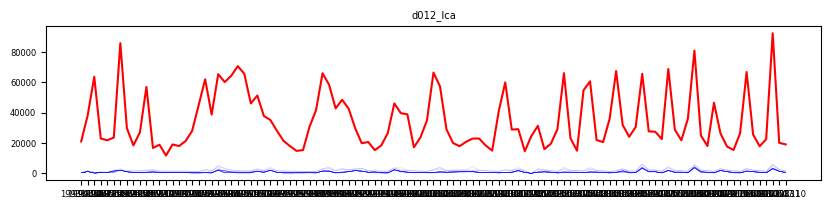

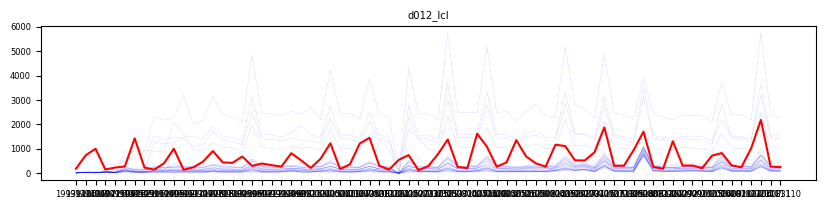

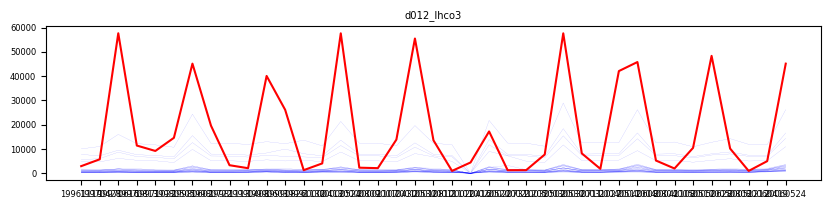

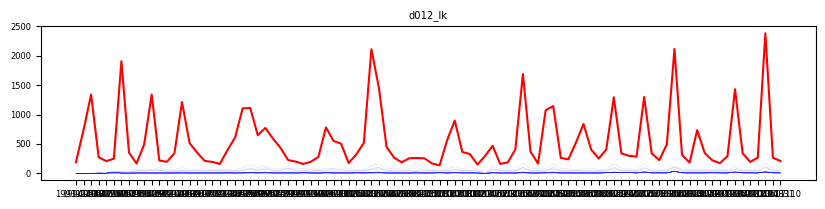

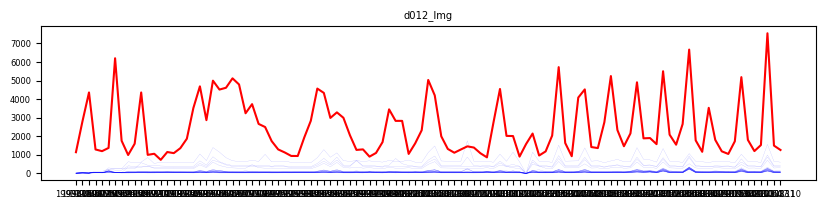

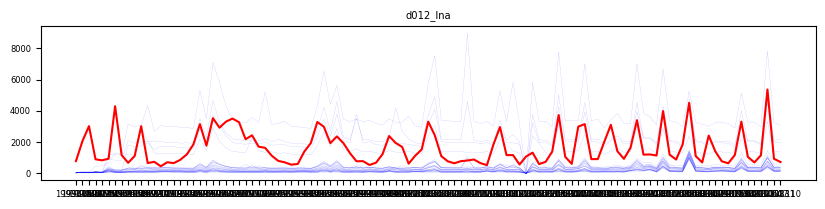

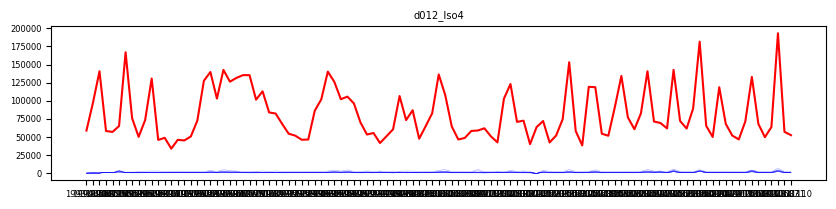

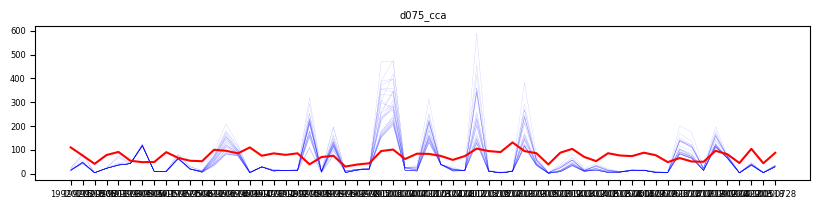

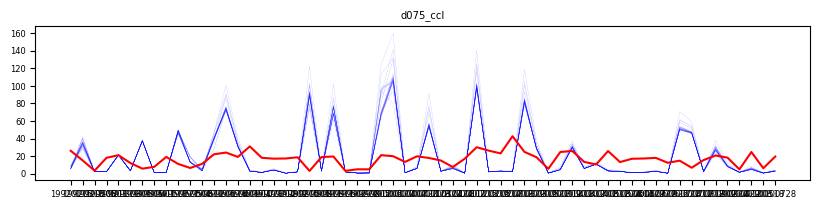

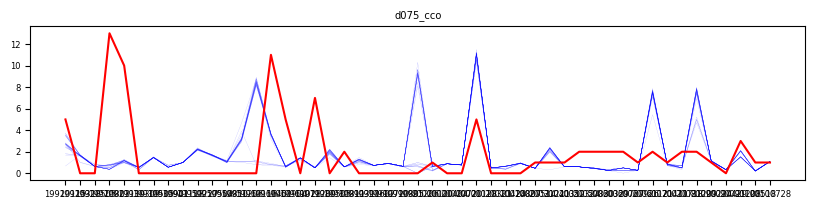

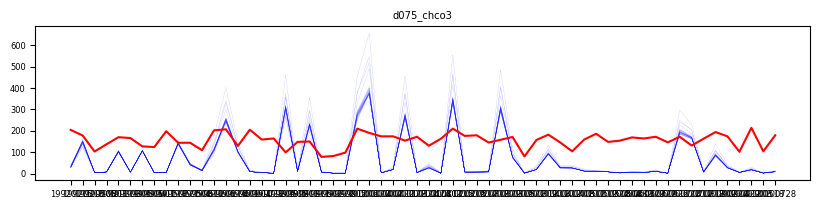

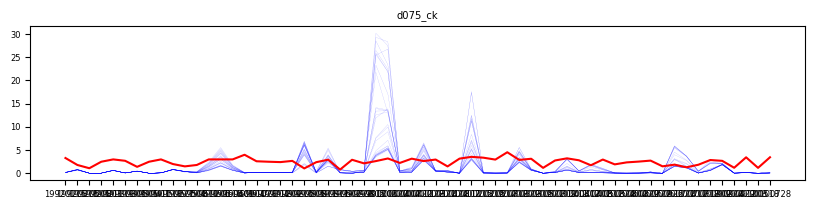

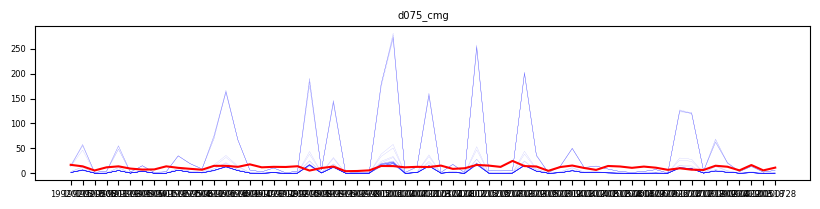

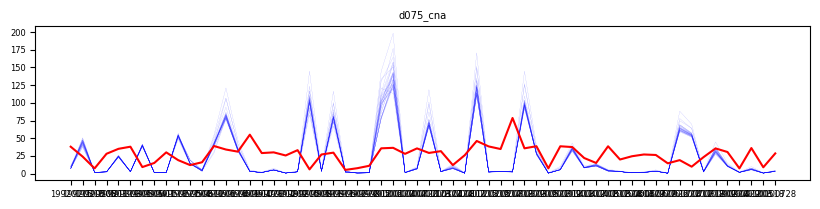

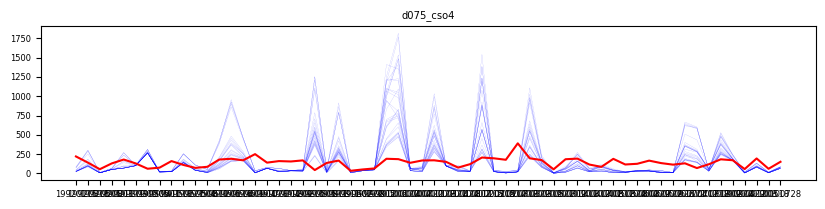

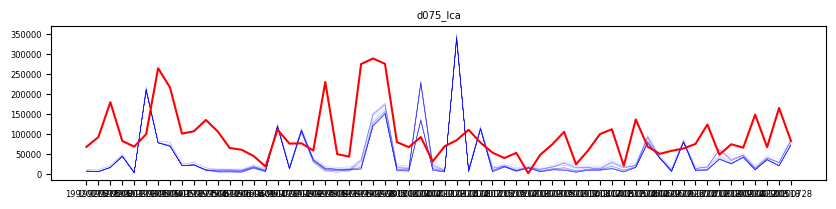

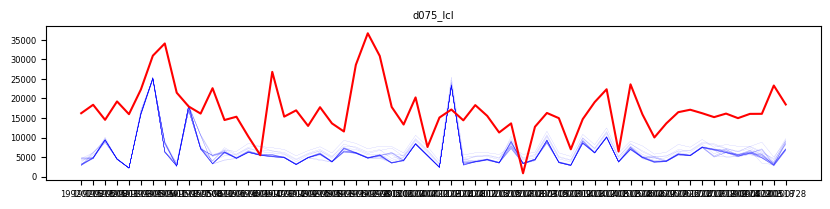

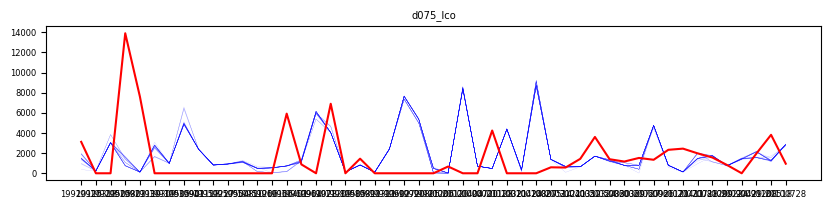

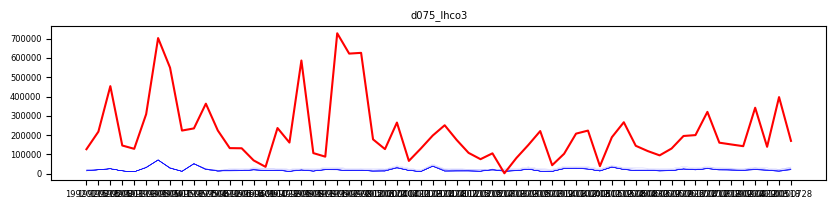

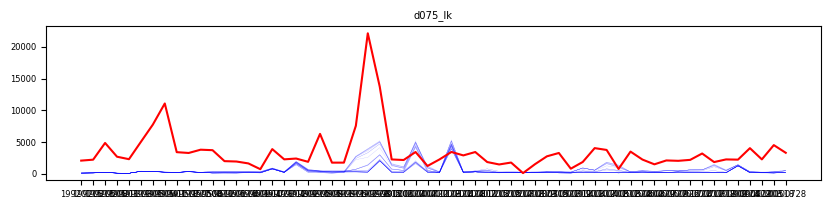

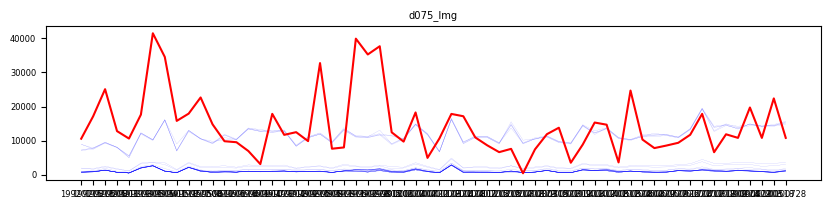

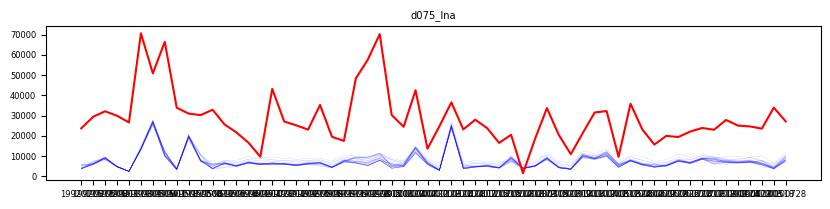

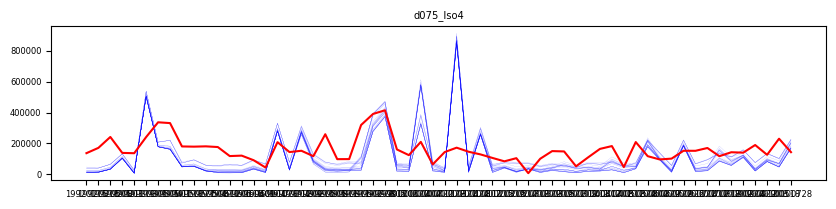

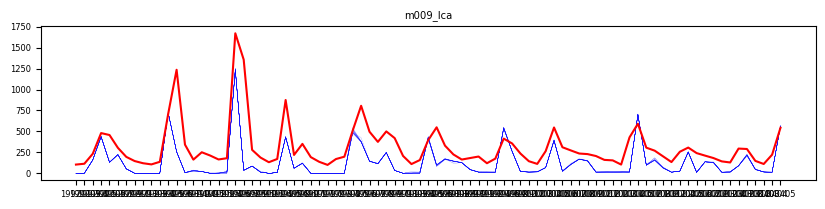

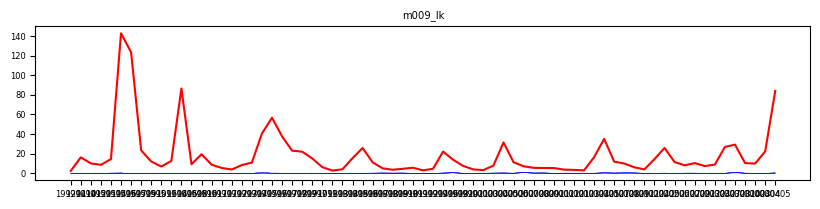

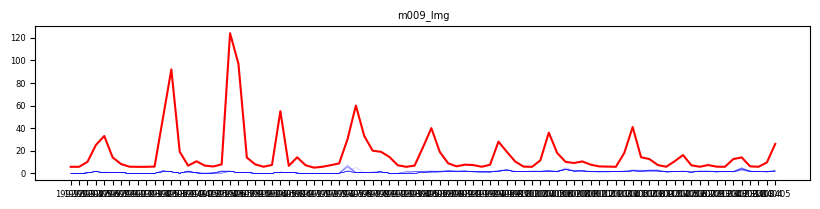

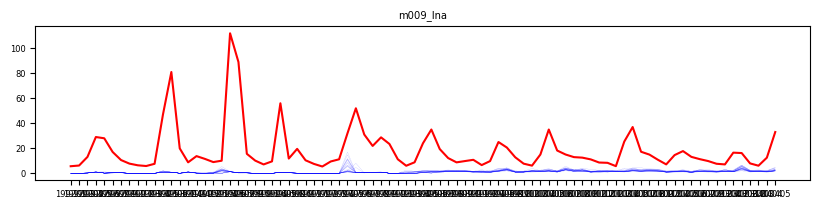

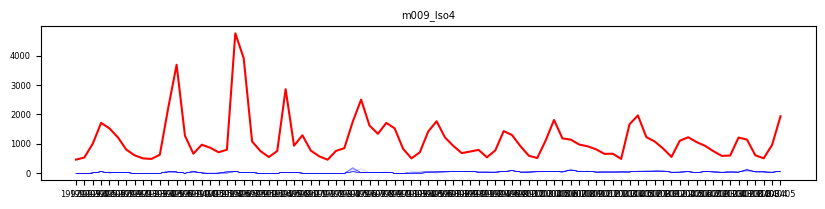

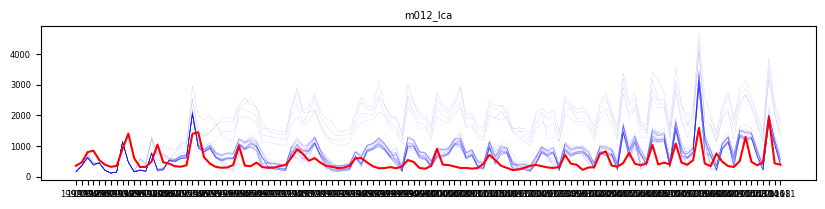

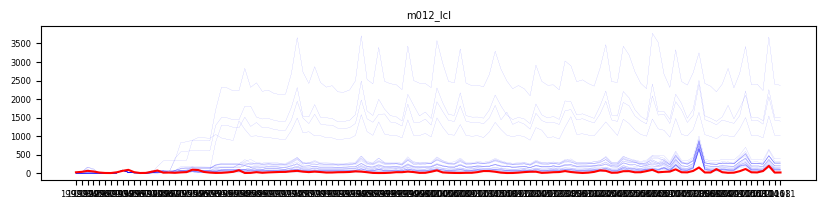

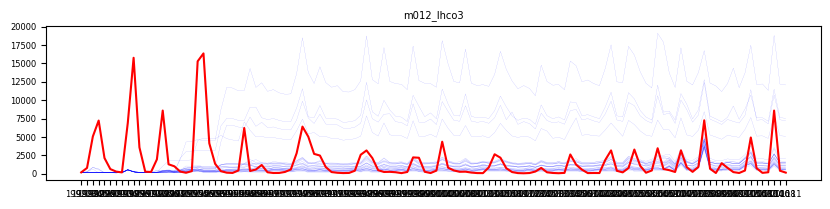

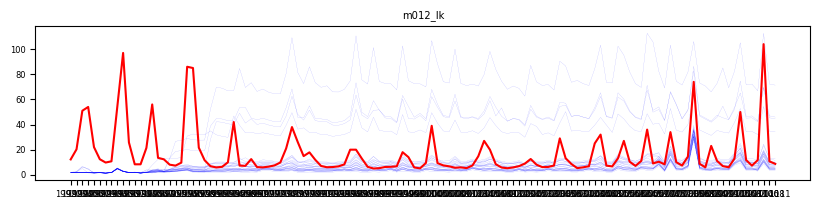

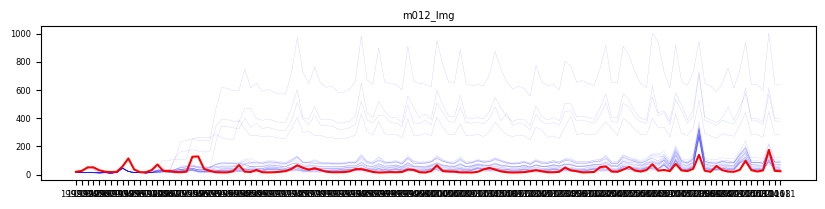

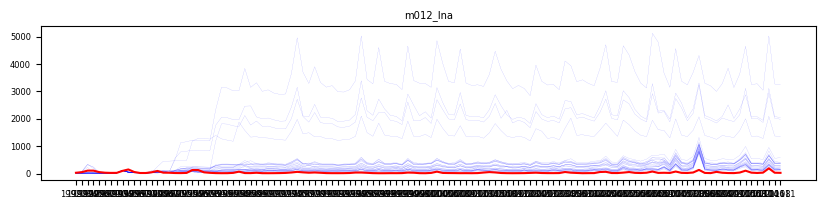

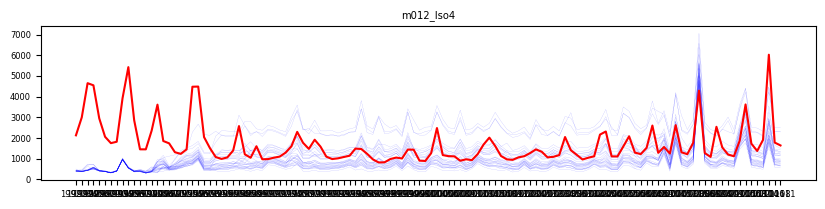

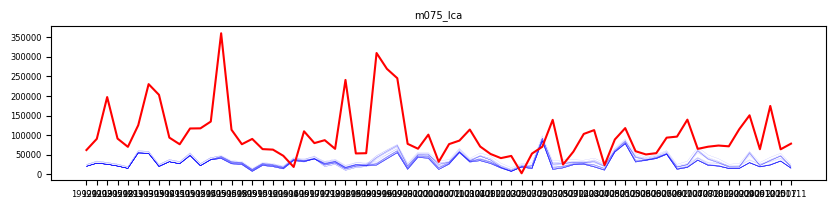

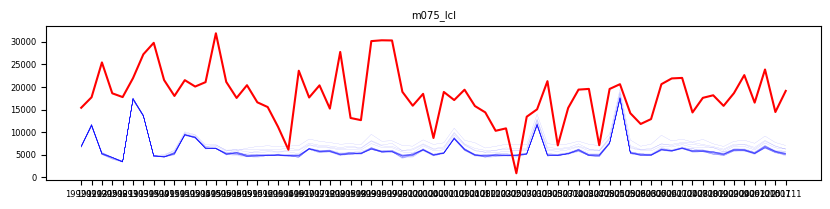

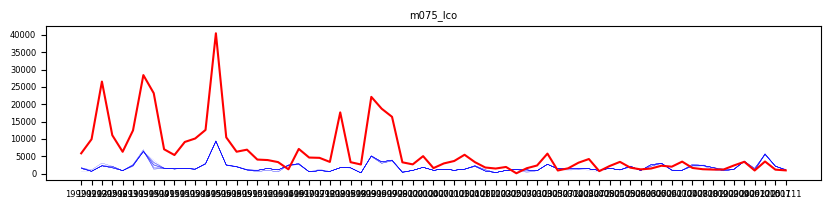

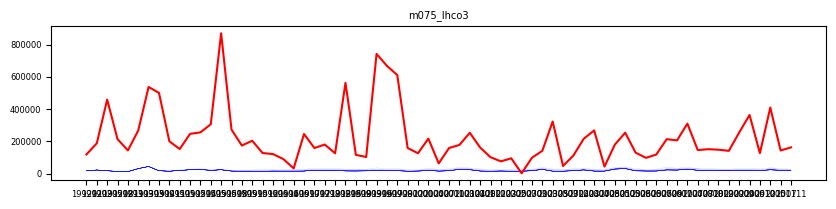

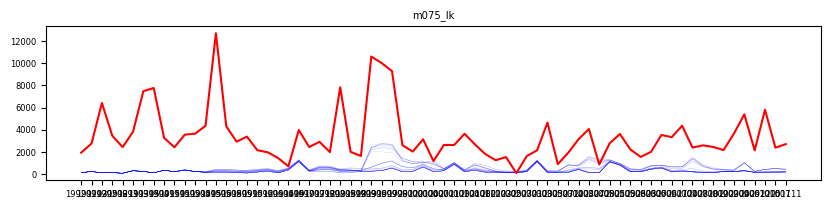

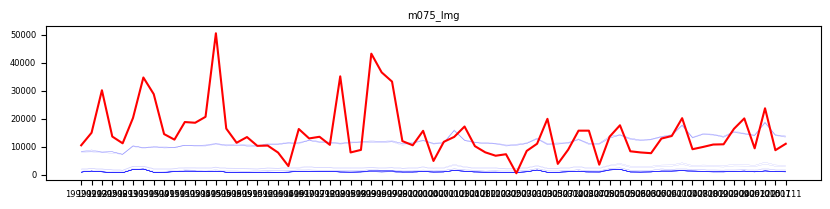

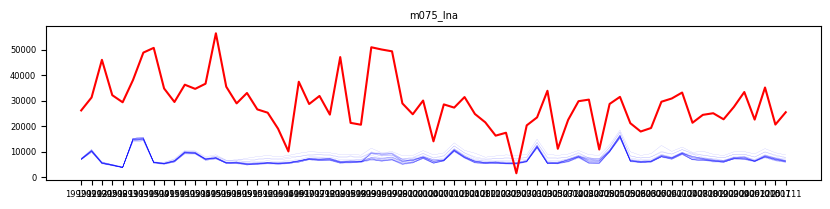

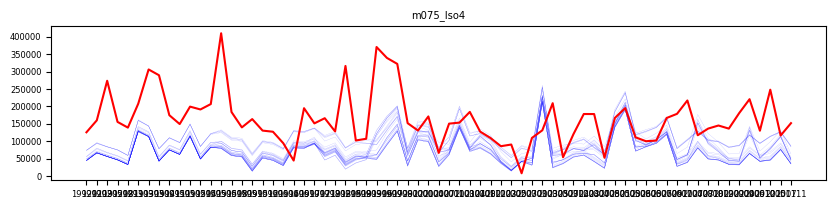

In [44]:
nz_obs = pst.observation_data.loc[pst.nnz_obs_names,:].copy()
time_col = []
for i in range(len(nz_obs)):
    if nz_obs.iloc[i, 0][0] == "d":
        time_col.append(nz_obs.iloc[i, 0][-8:])
    elif nz_obs.iloc[i, 0][0] == "m":
        time_col.append(nz_obs.iloc[i, 0][-6:])
nz_obs.time = time_col       
for nz_group in pst.nnz_obs_groups:
    # select obs values
    nz_obs_group = nz_obs.loc[nz_obs.obgnme==nz_group,:]
    nz_obs_group.time = nz_obs_group.time.astype(str)
#     nz_obs_group.sort_values('time', inplace=True)
    fig,ax = plt.subplots(1,1,figsize=(10,2))
    # plot measured values
    [ax.plot(nz_obs_group.time,oe_pt.loc[r,nz_obs_group.obsnme],color="b",lw=0.1,alpha=0.5) for r in oe_pt.index]
    ax.plot(nz_obs_group.time,nz_obs_group.obsval,"r-")
    # plot simulated values from post ensemble

    ax.set_title(nz_group)
plt.show()

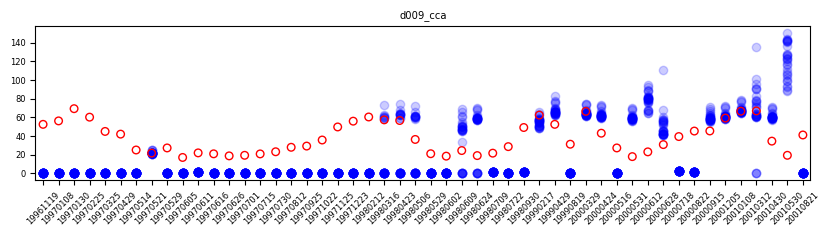

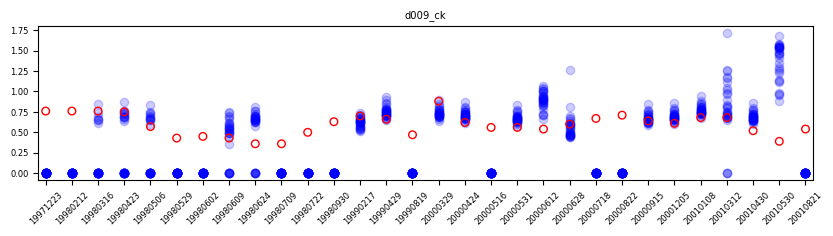

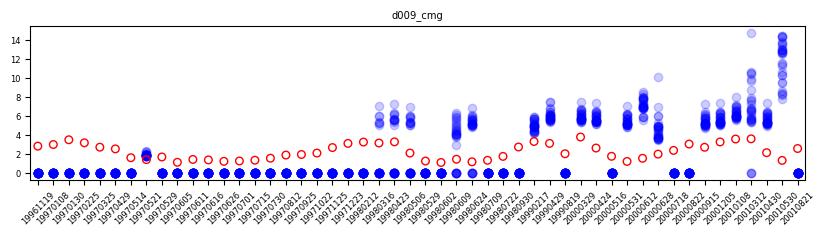

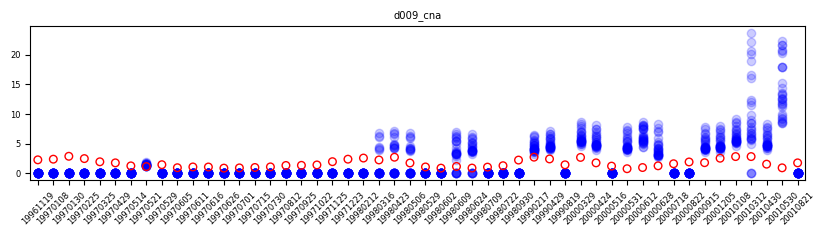

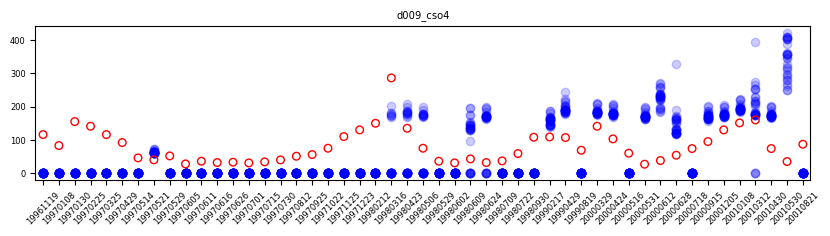

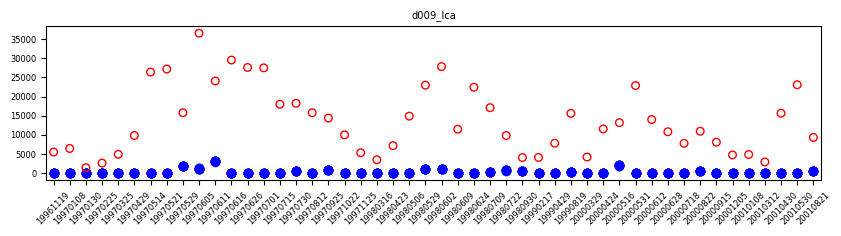

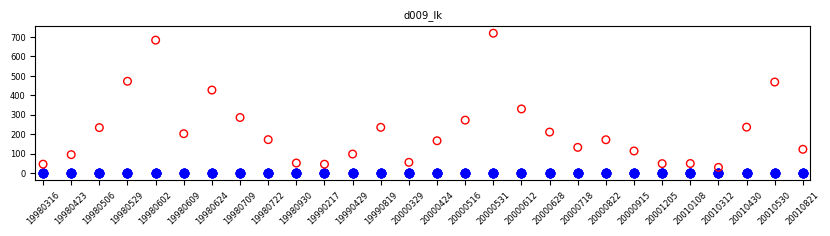

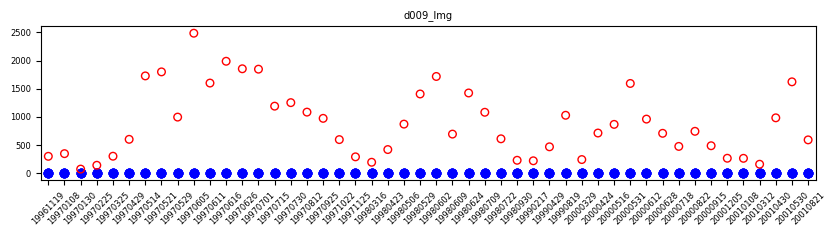

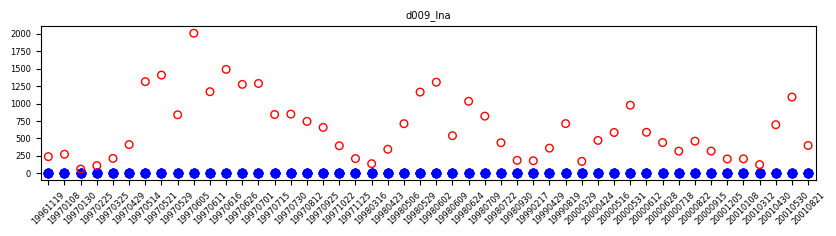

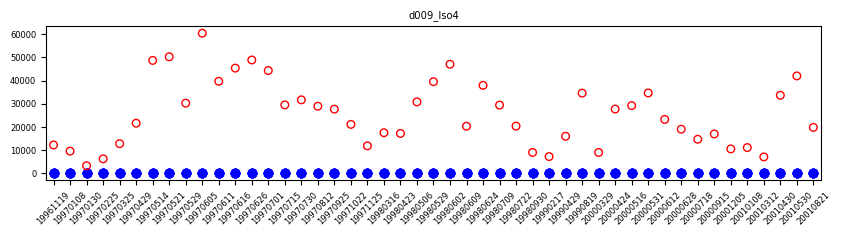

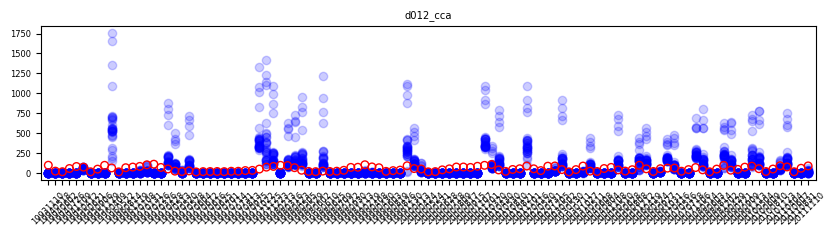

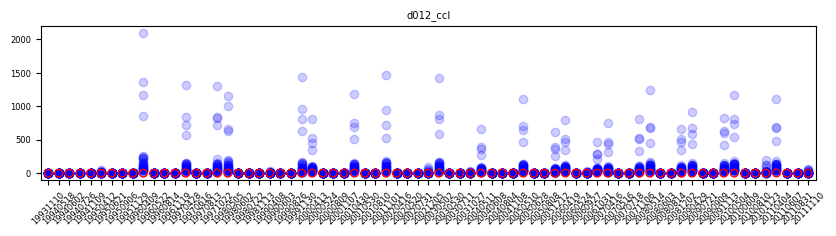

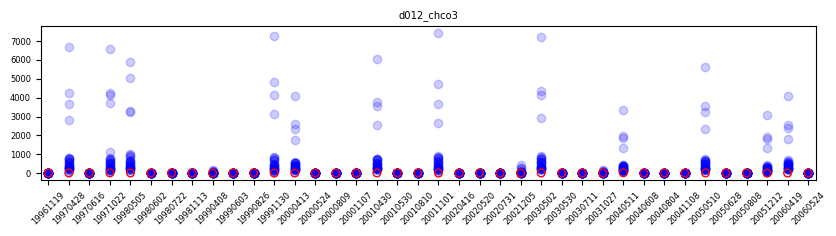

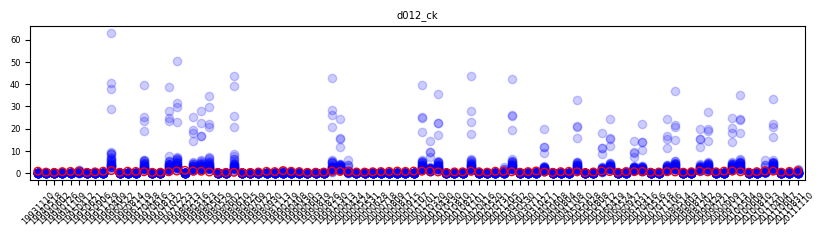

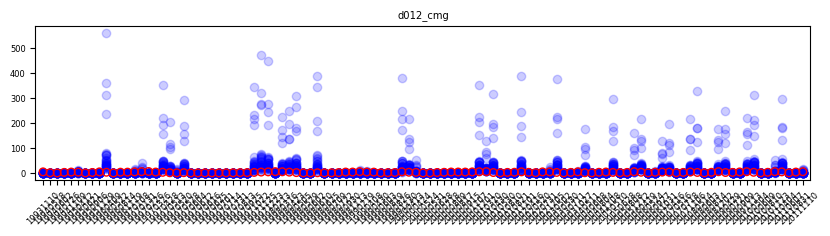

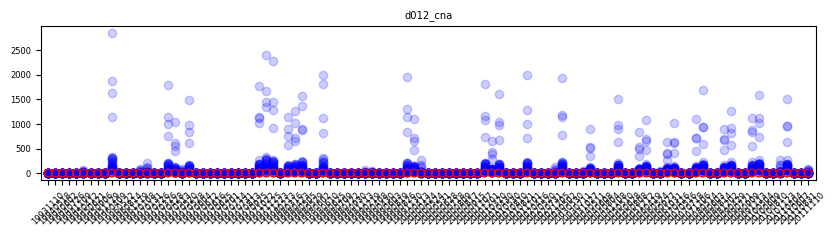

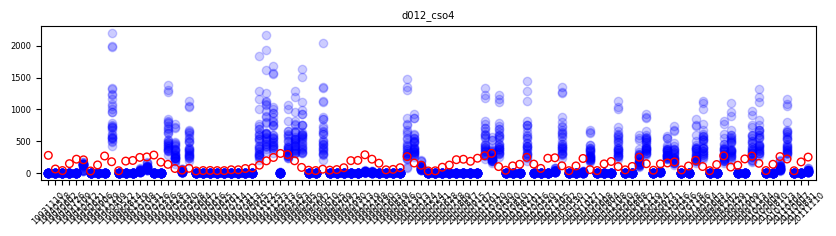

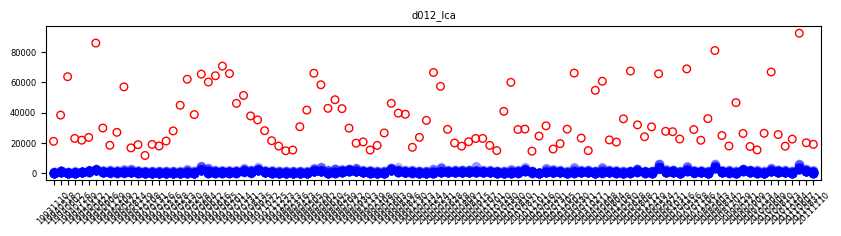

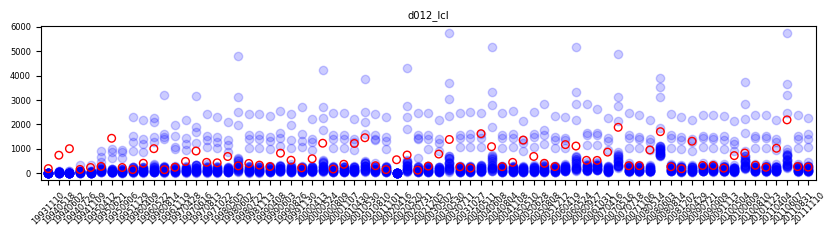

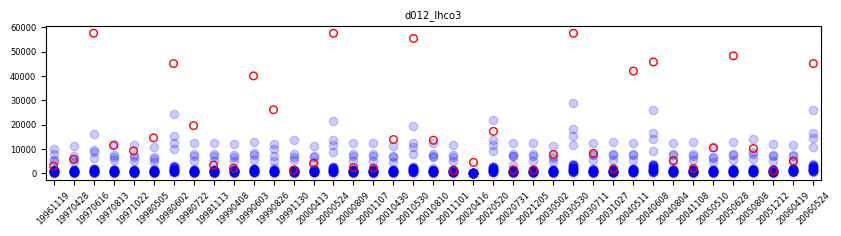

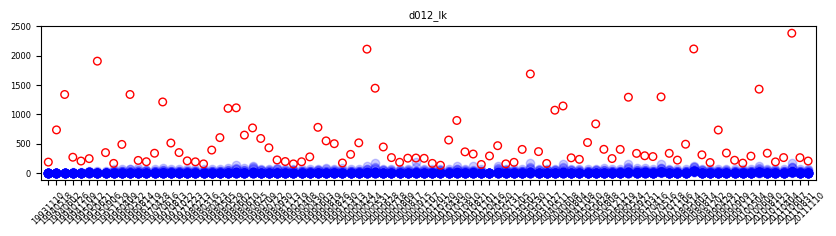

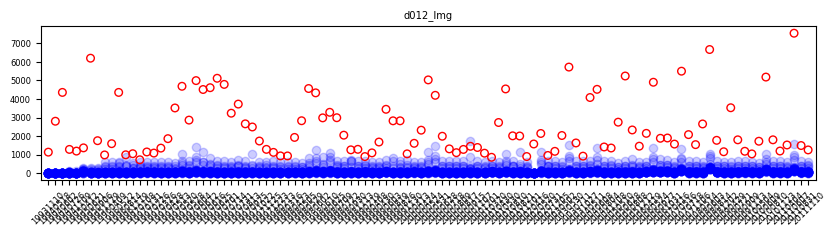

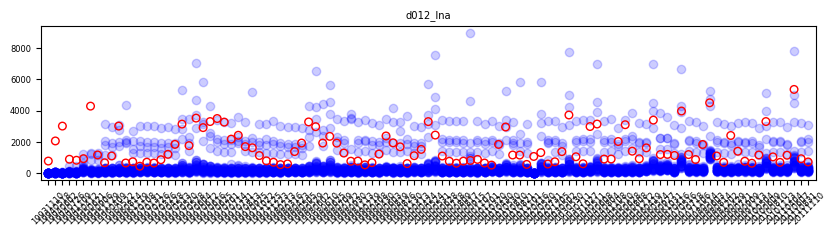

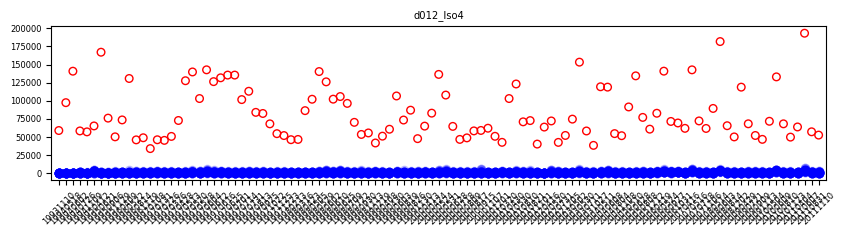

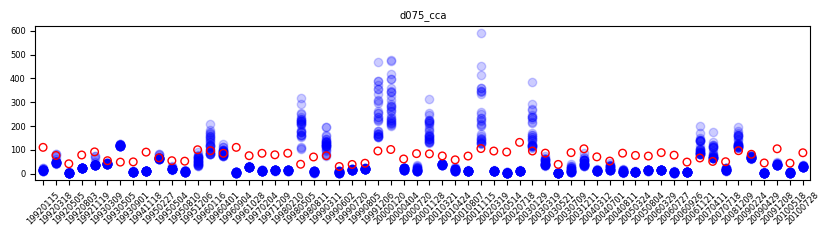

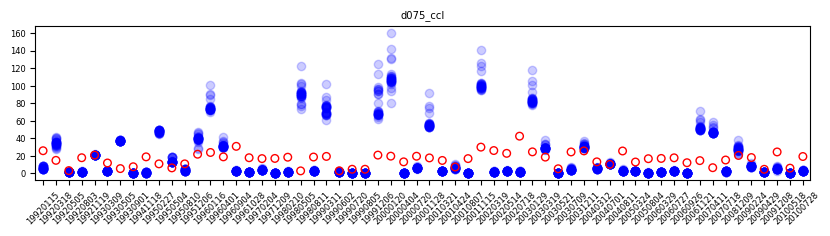

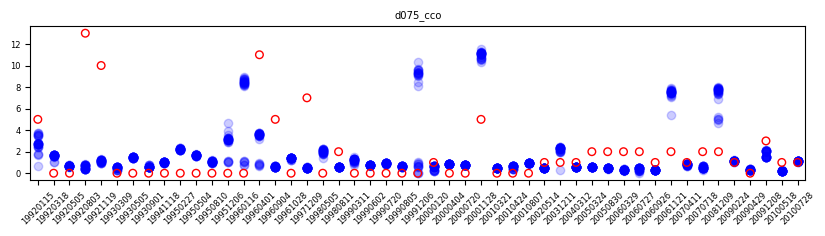

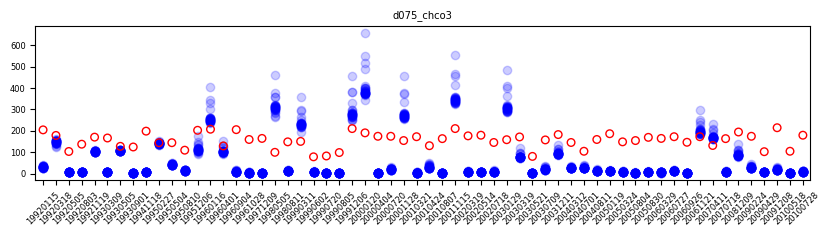

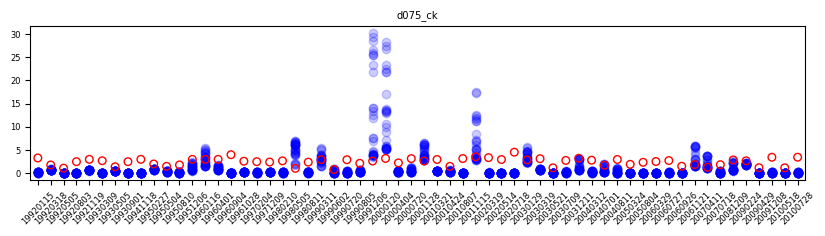

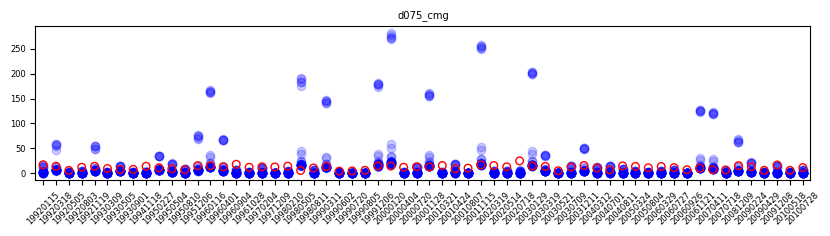

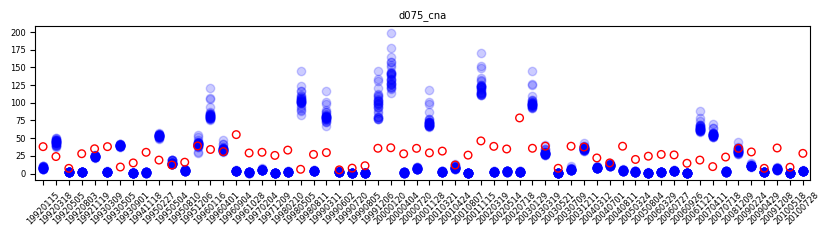

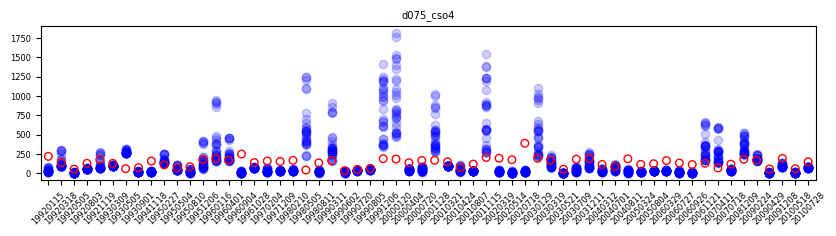

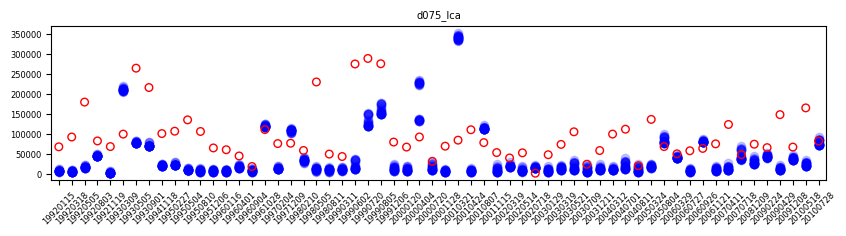

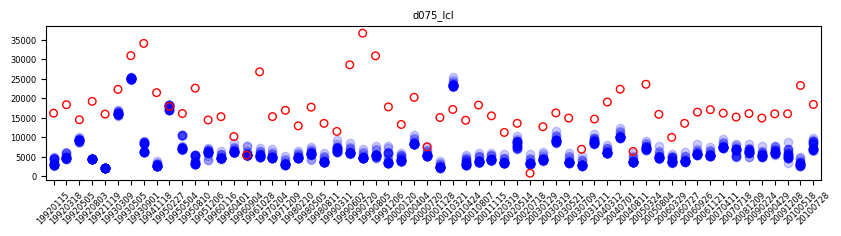

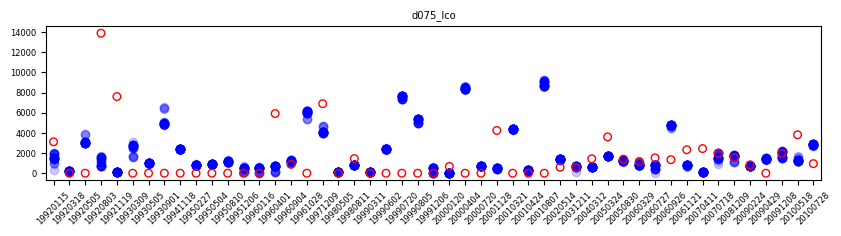

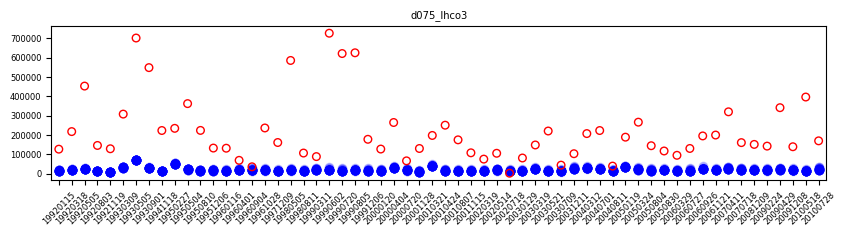

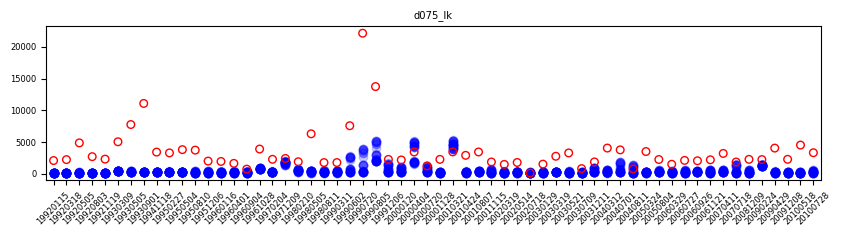

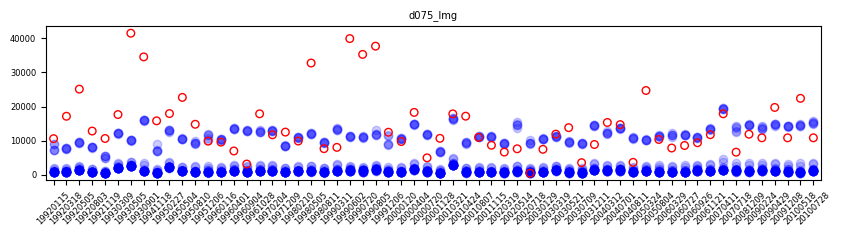

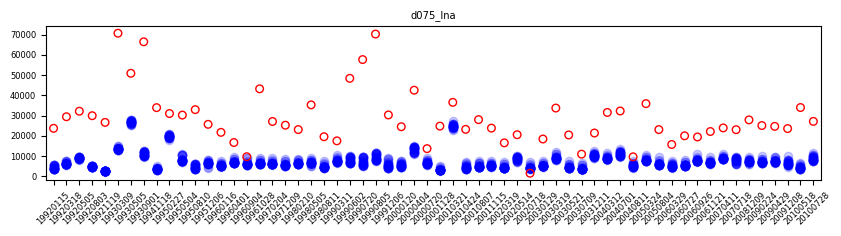

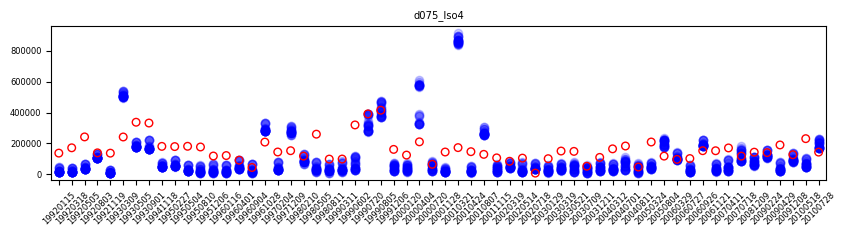

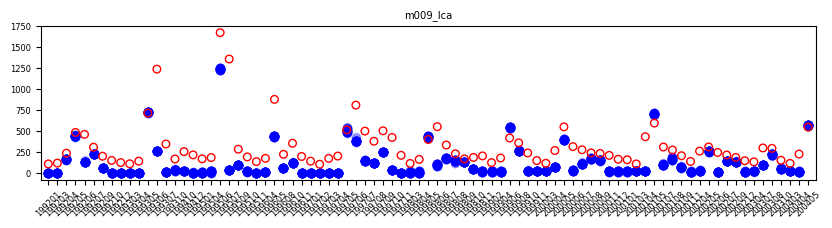

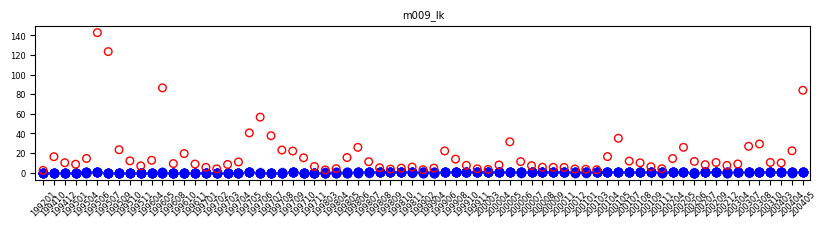

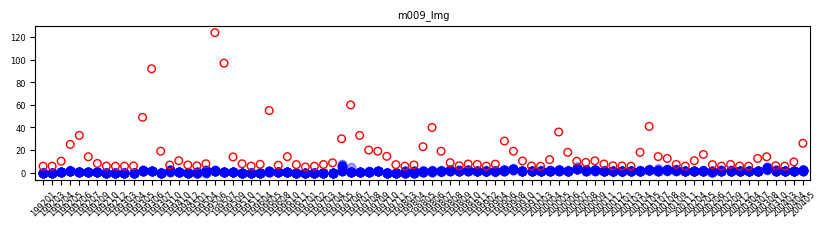

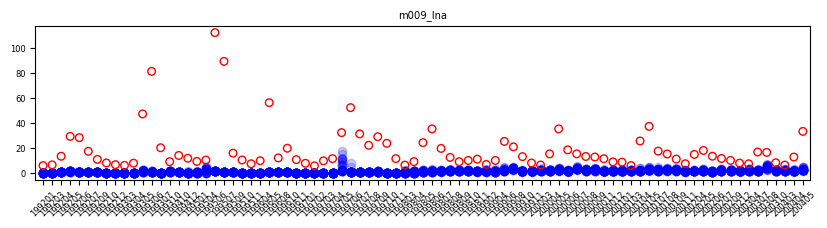

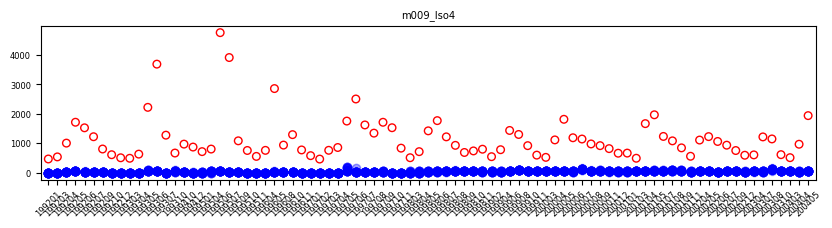

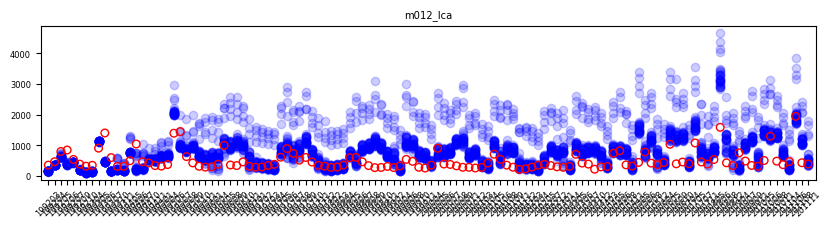

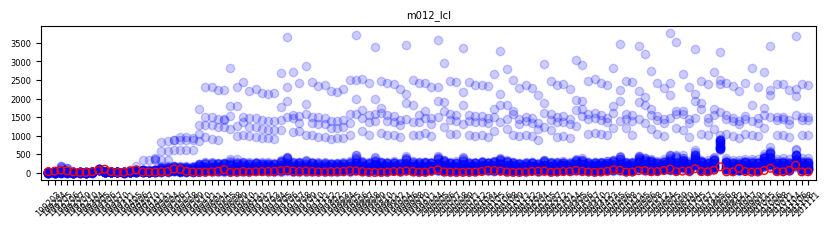

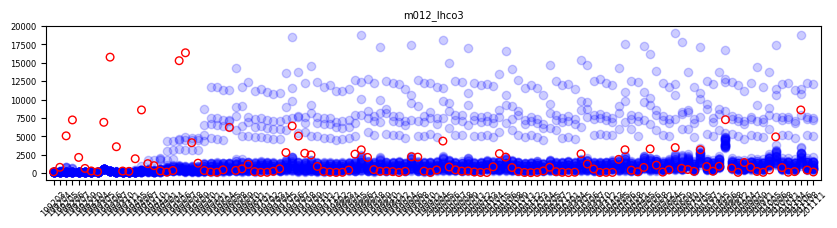

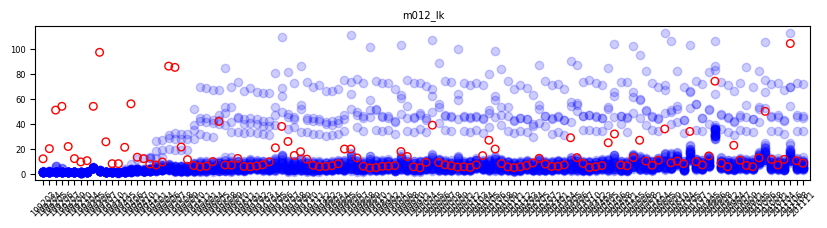

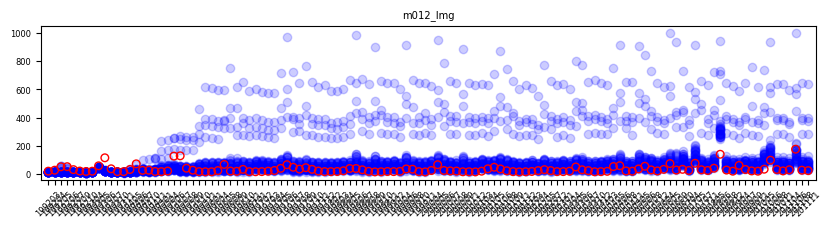

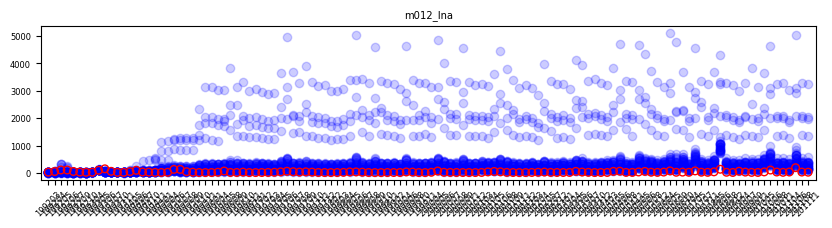

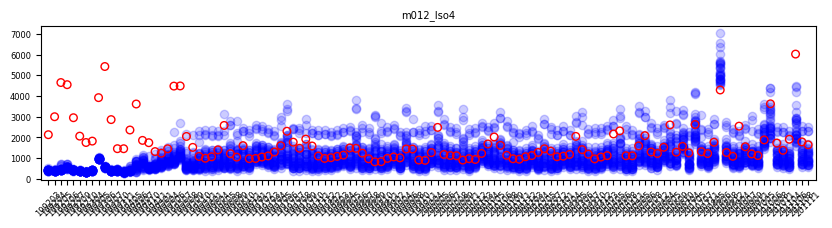

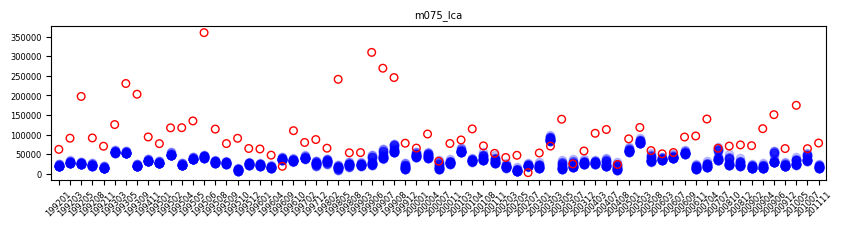

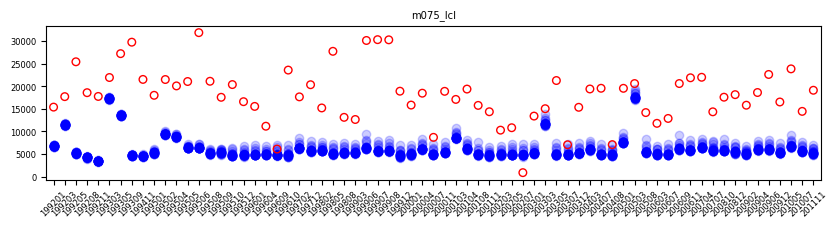

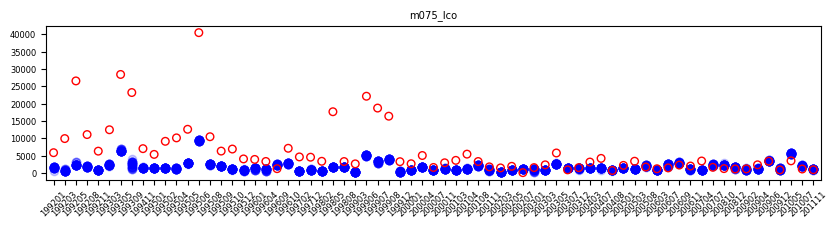

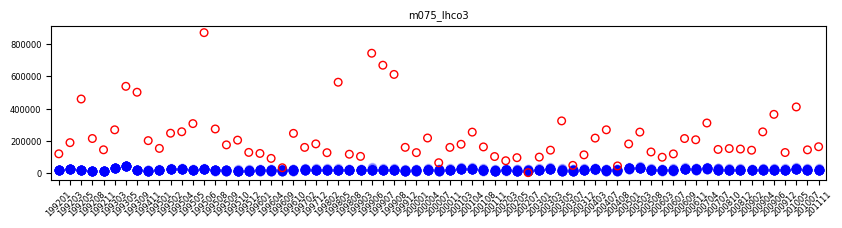

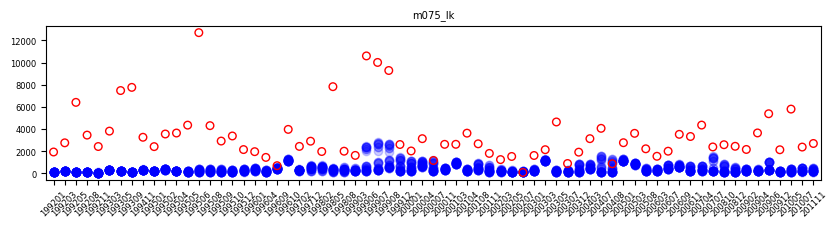

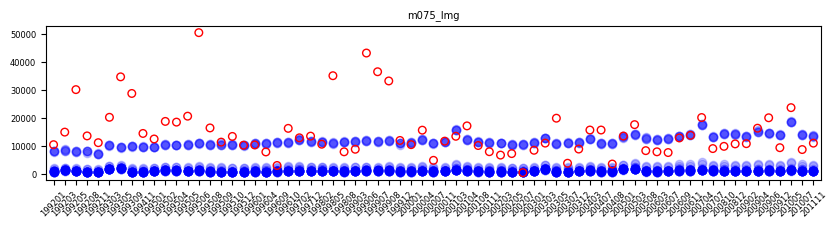

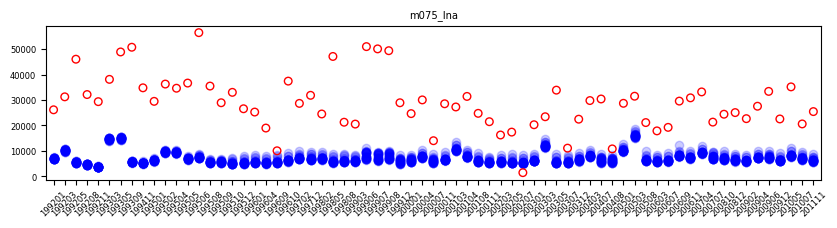

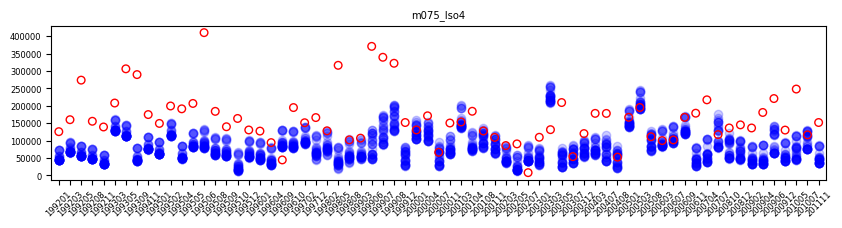

In [47]:
nz_obs = pst.observation_data.loc[pst.nnz_obs_names,:].copy()
time_col = []
for i in range(len(nz_obs)):
    if nz_obs.iloc[i, 0][0] == "d":
        time_col.append(nz_obs.iloc[i, 0][-8:])
    elif nz_obs.iloc[i, 0][0] == "m":
        time_col.append(nz_obs.iloc[i, 0][-6:])
nz_obs.time = time_col       
for nz_group in pst.nnz_obs_groups:
    # select obs values
    nz_obs_group = nz_obs.loc[nz_obs.obgnme==nz_group,:]
    nz_obs_group.time = nz_obs_group.time.astype(str)
#     nz_obs_group.sort_values('time', inplace=True)
    fig,ax = plt.subplots(1,1,figsize=(10,2))
    # plot simulated values from post ensemble
    [ax.scatter(nz_obs_group.time,oe_pt.loc[r,nz_obs_group.obsnme],color="b",alpha=0.2) for r in oe_pt.index]
    # plot measured values
    ax.scatter(nz_obs_group.time,nz_obs_group.obsval, color="red", s=30).set_facecolor("none")
    ax.tick_params(axis='x', labelrotation=45)
    ax.margins(x=0.01)
    ax.set_title(nz_group)
plt.show()